In [1]:
import pandas as pd
import glob
import os
from sklearn.metrics import average_precision_score, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

/users/arpitas/miniconda3/envs/dnalm/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from variant_tasks import *

In [3]:
os.environ['DART_WORK_DIR'] = '/oak/stanford/groups/akundaje/arpitas/dart-eval'
work_dir = os.environ.get("DART_WORK_DIR", "")
print(work_dir)

/oak/stanford/groups/akundaje/arpitas/dart-eval


unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.0
DNABert2 African Significant caQTLs


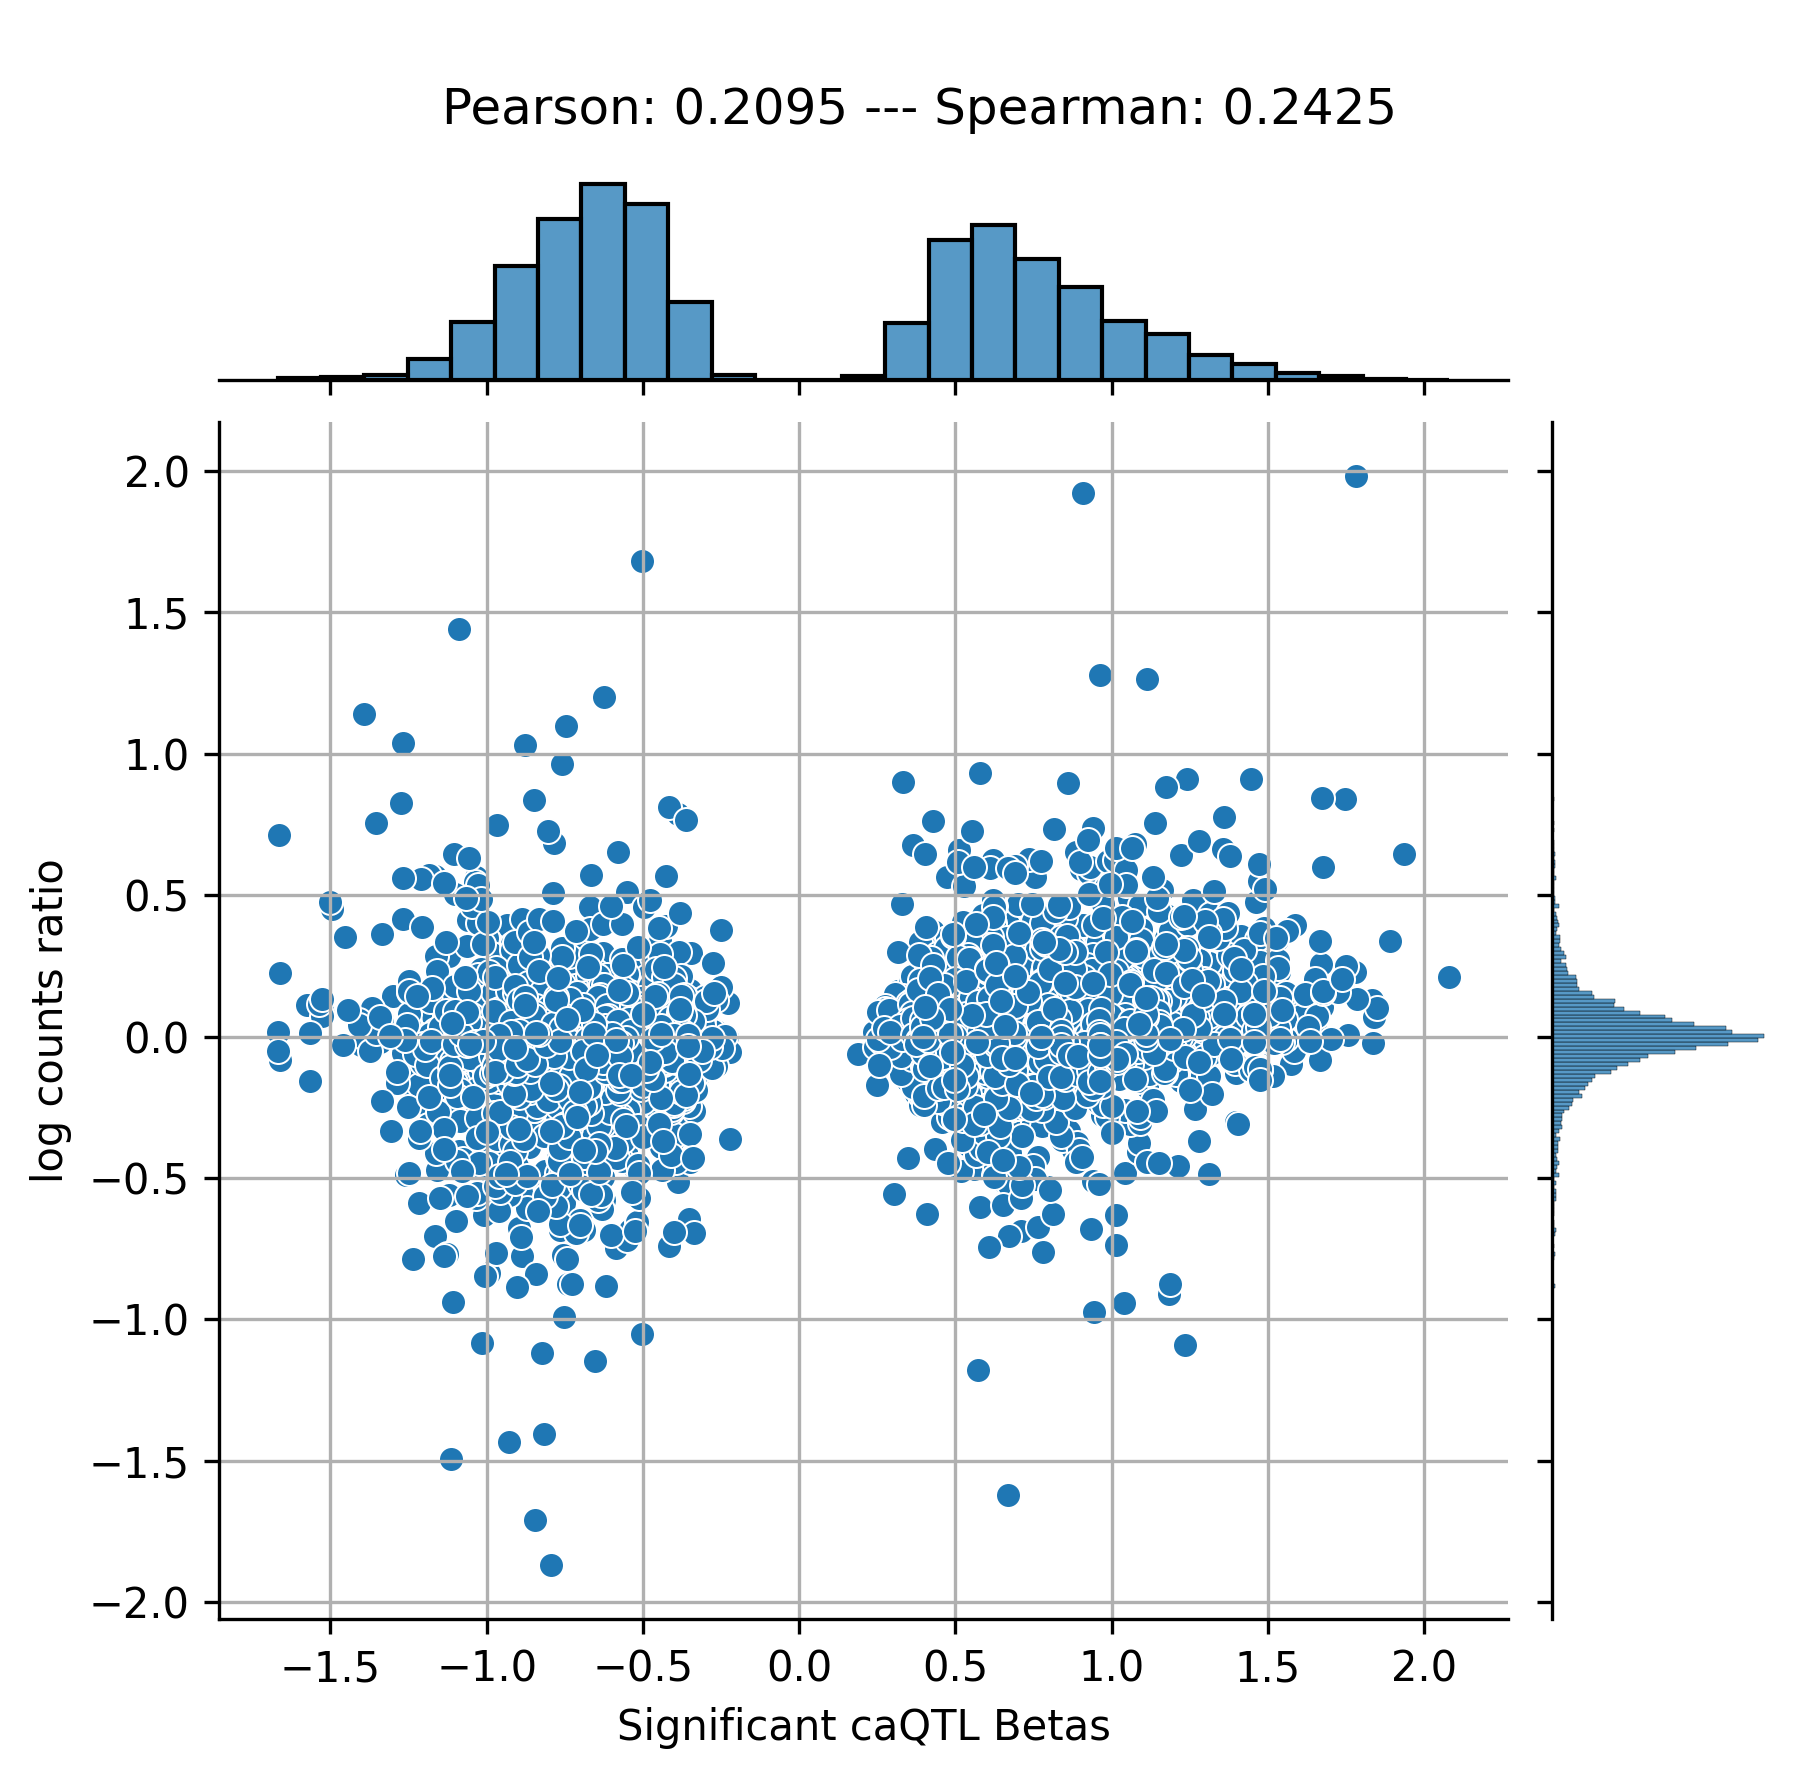

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 1.5594701979754912e-217
Gena LM African Significant caQTLs


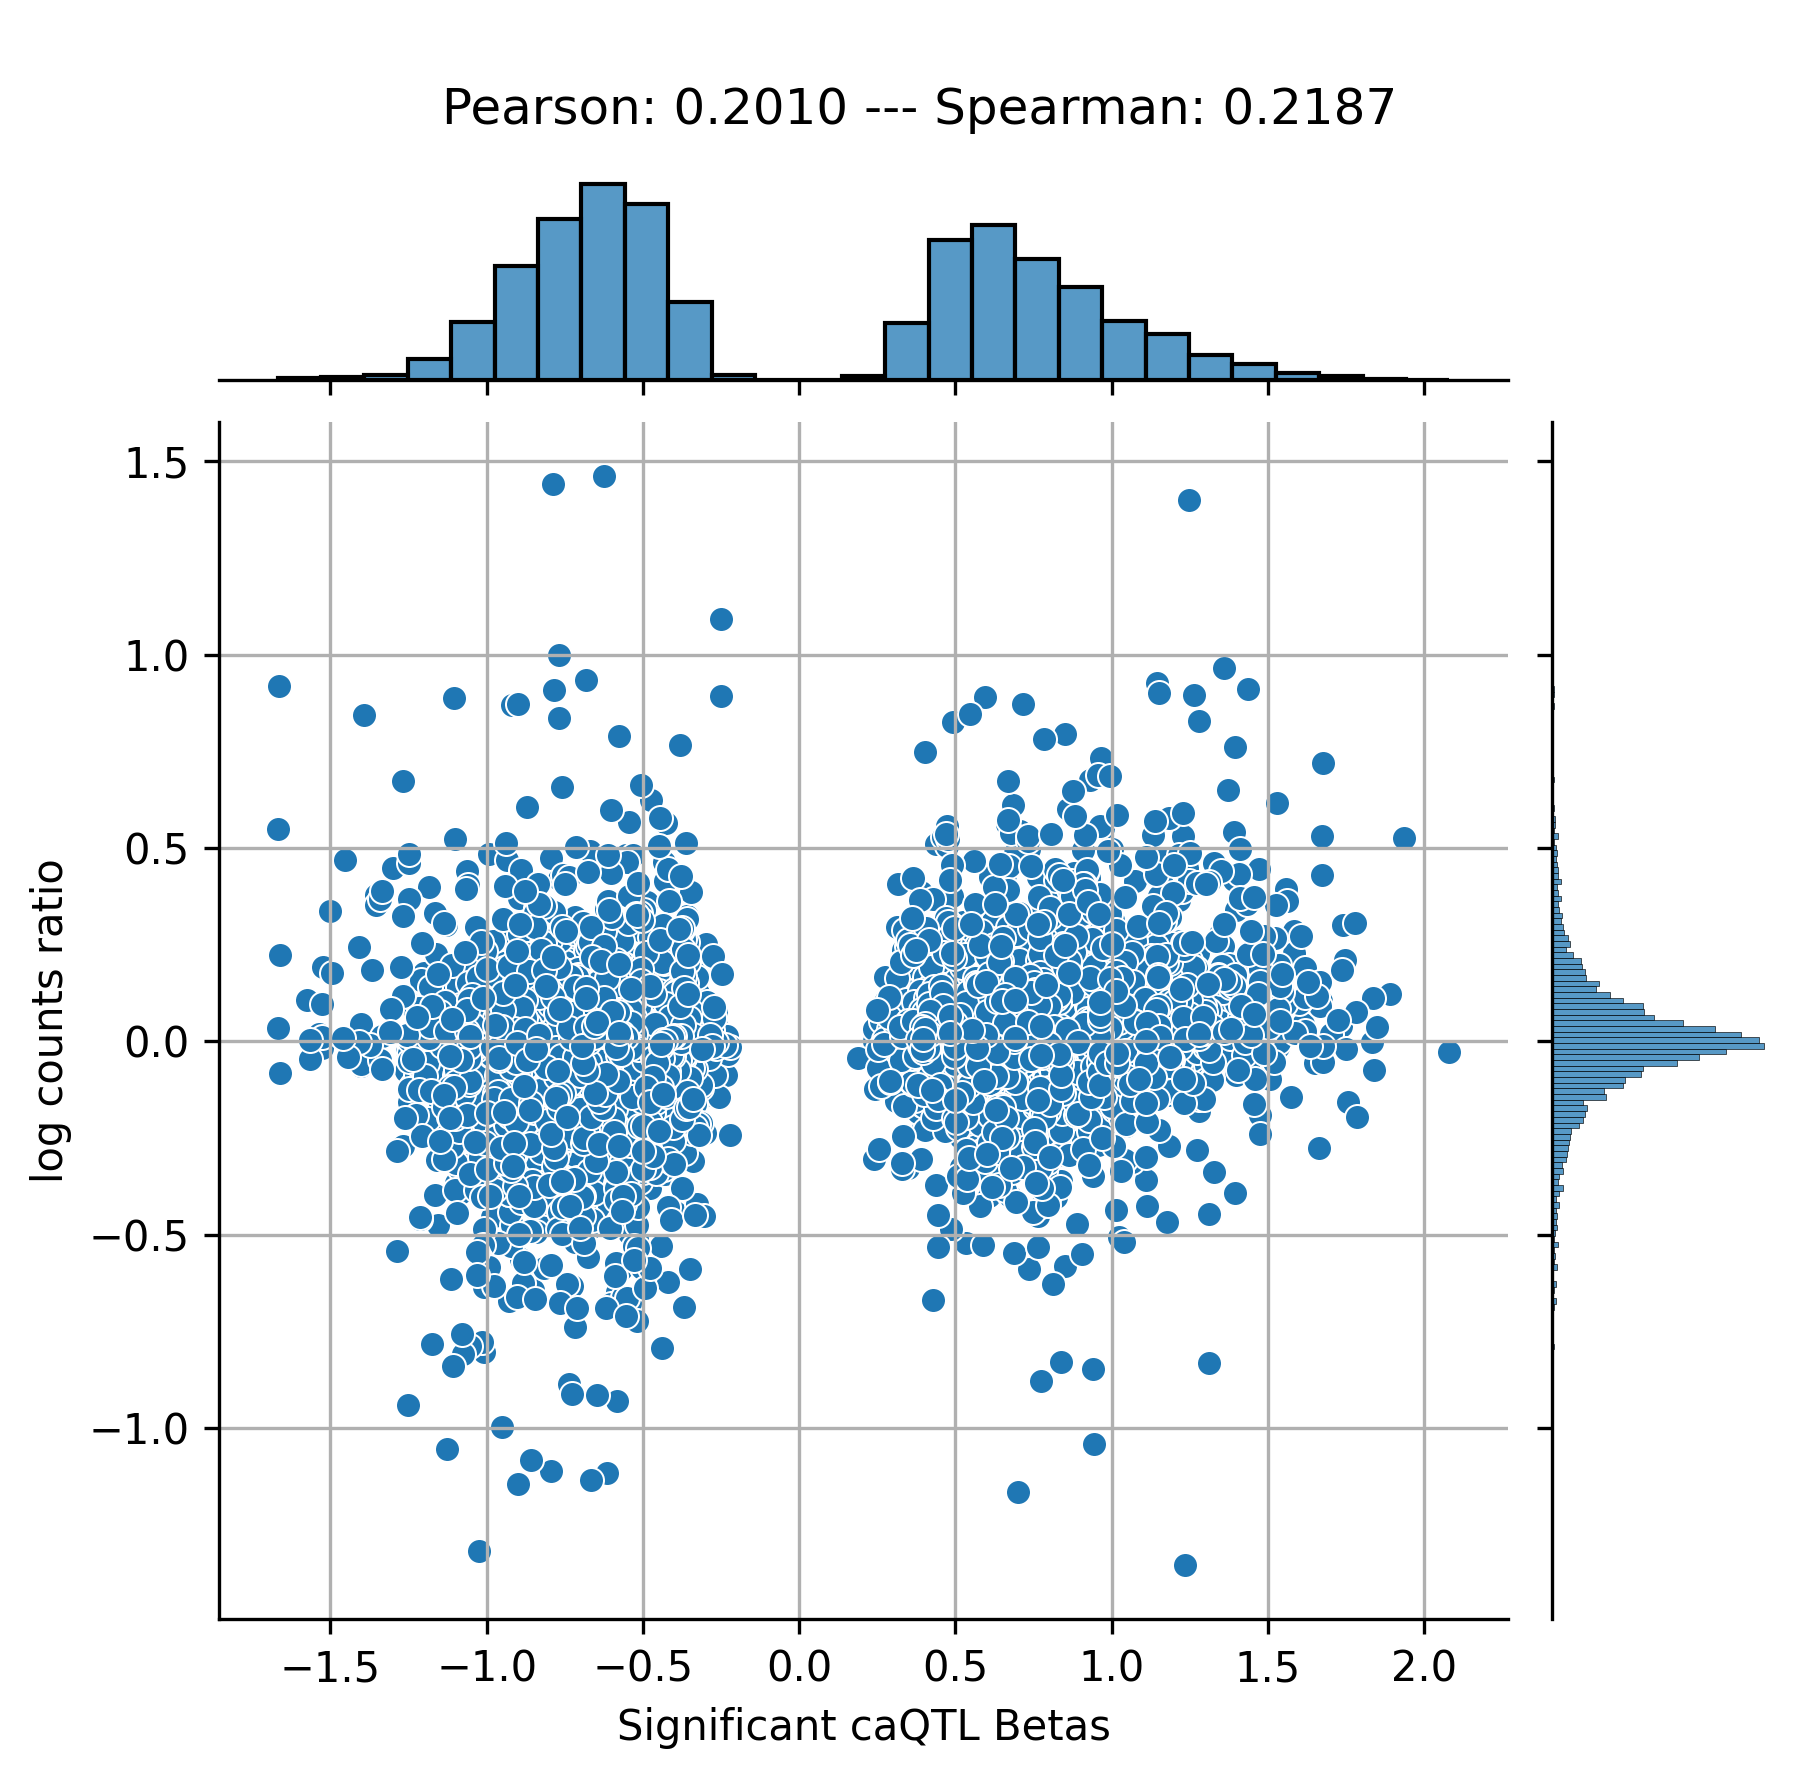

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 3.9048661921693917e-119
HyenaDNA African Significant caQTLs


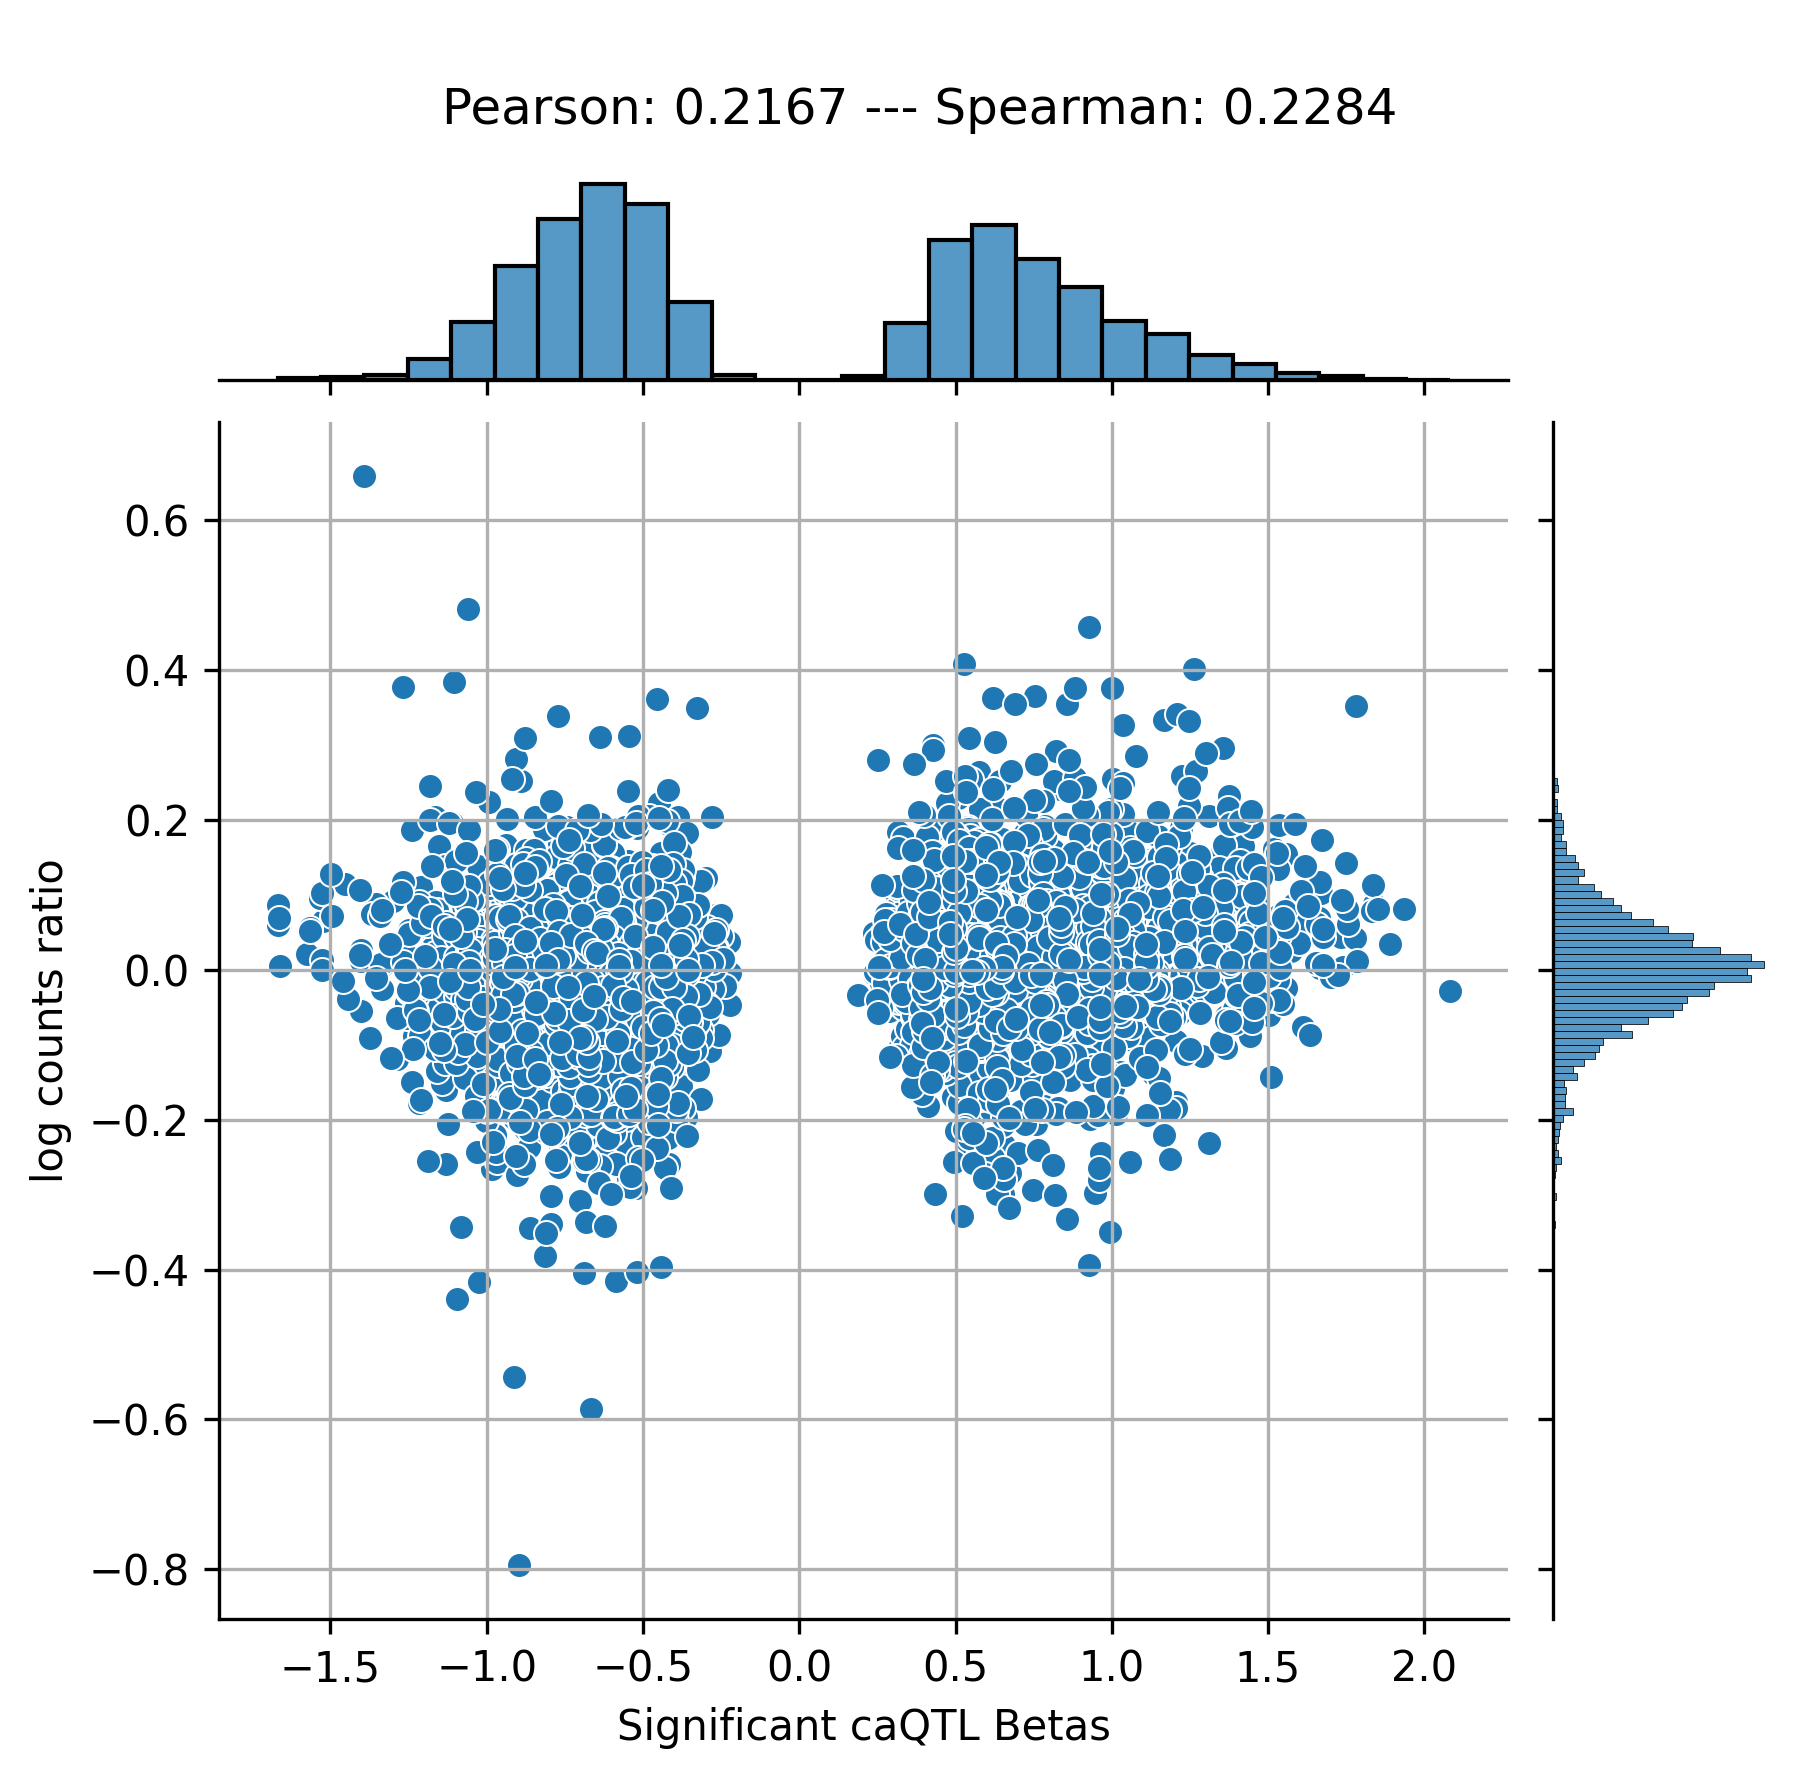

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 4.5233805799848844e-248
Nucleotide Transformer African Significant caQTLs


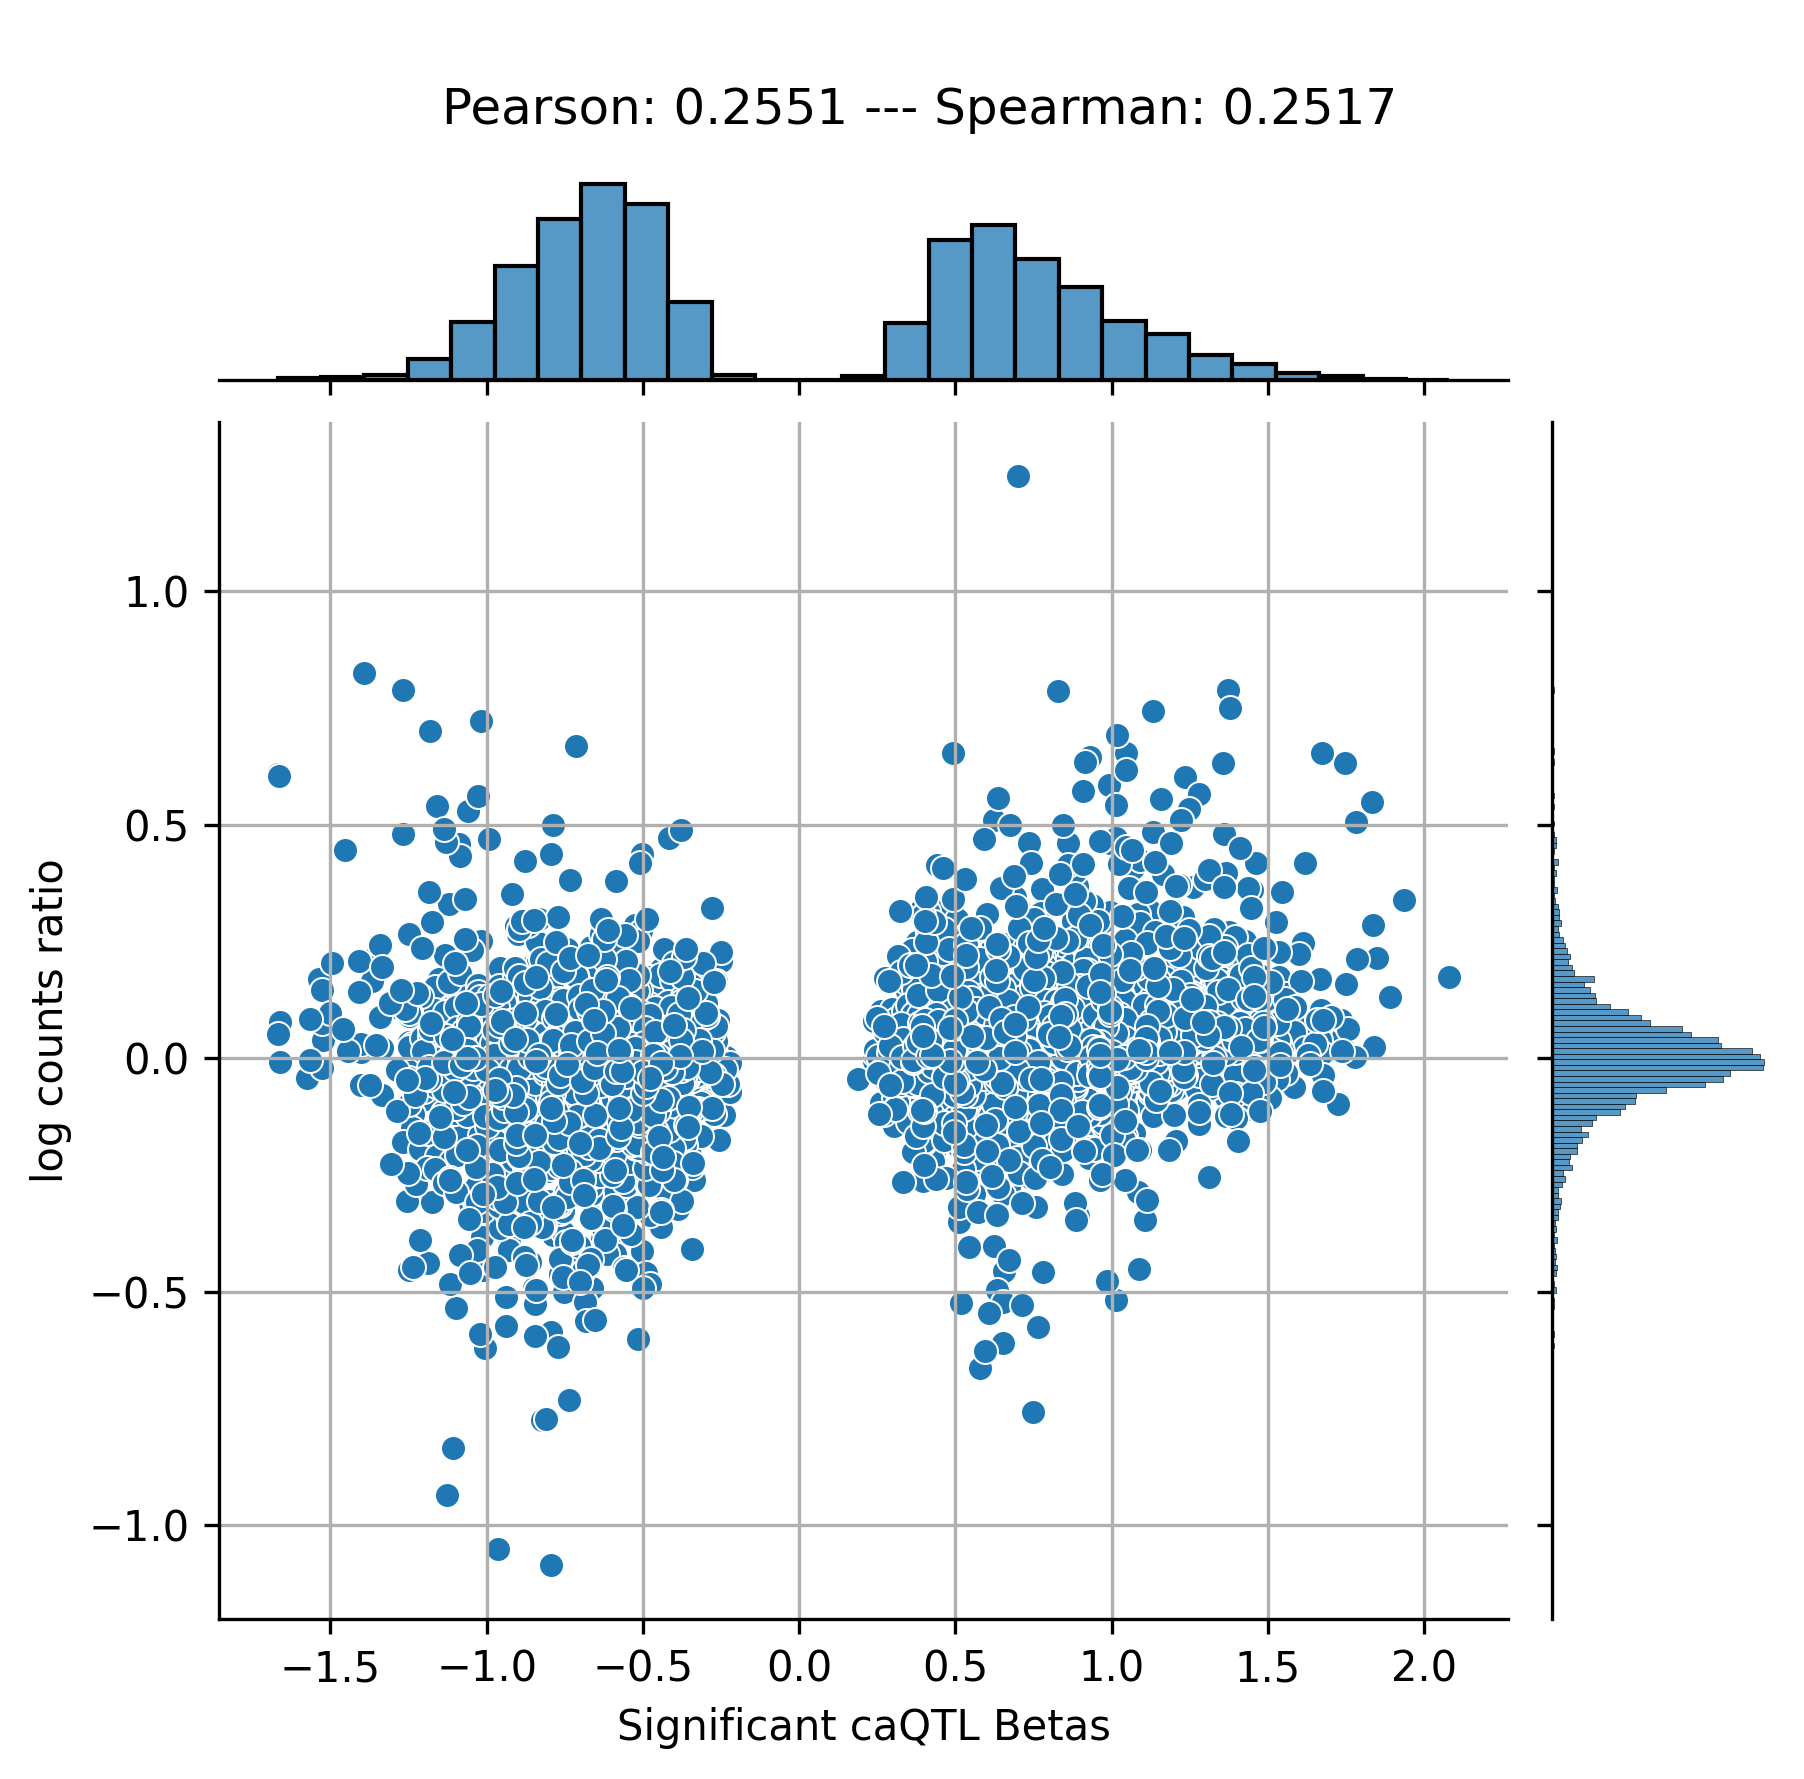

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.0027292135216989578
Mistral DNA African Significant caQTLs


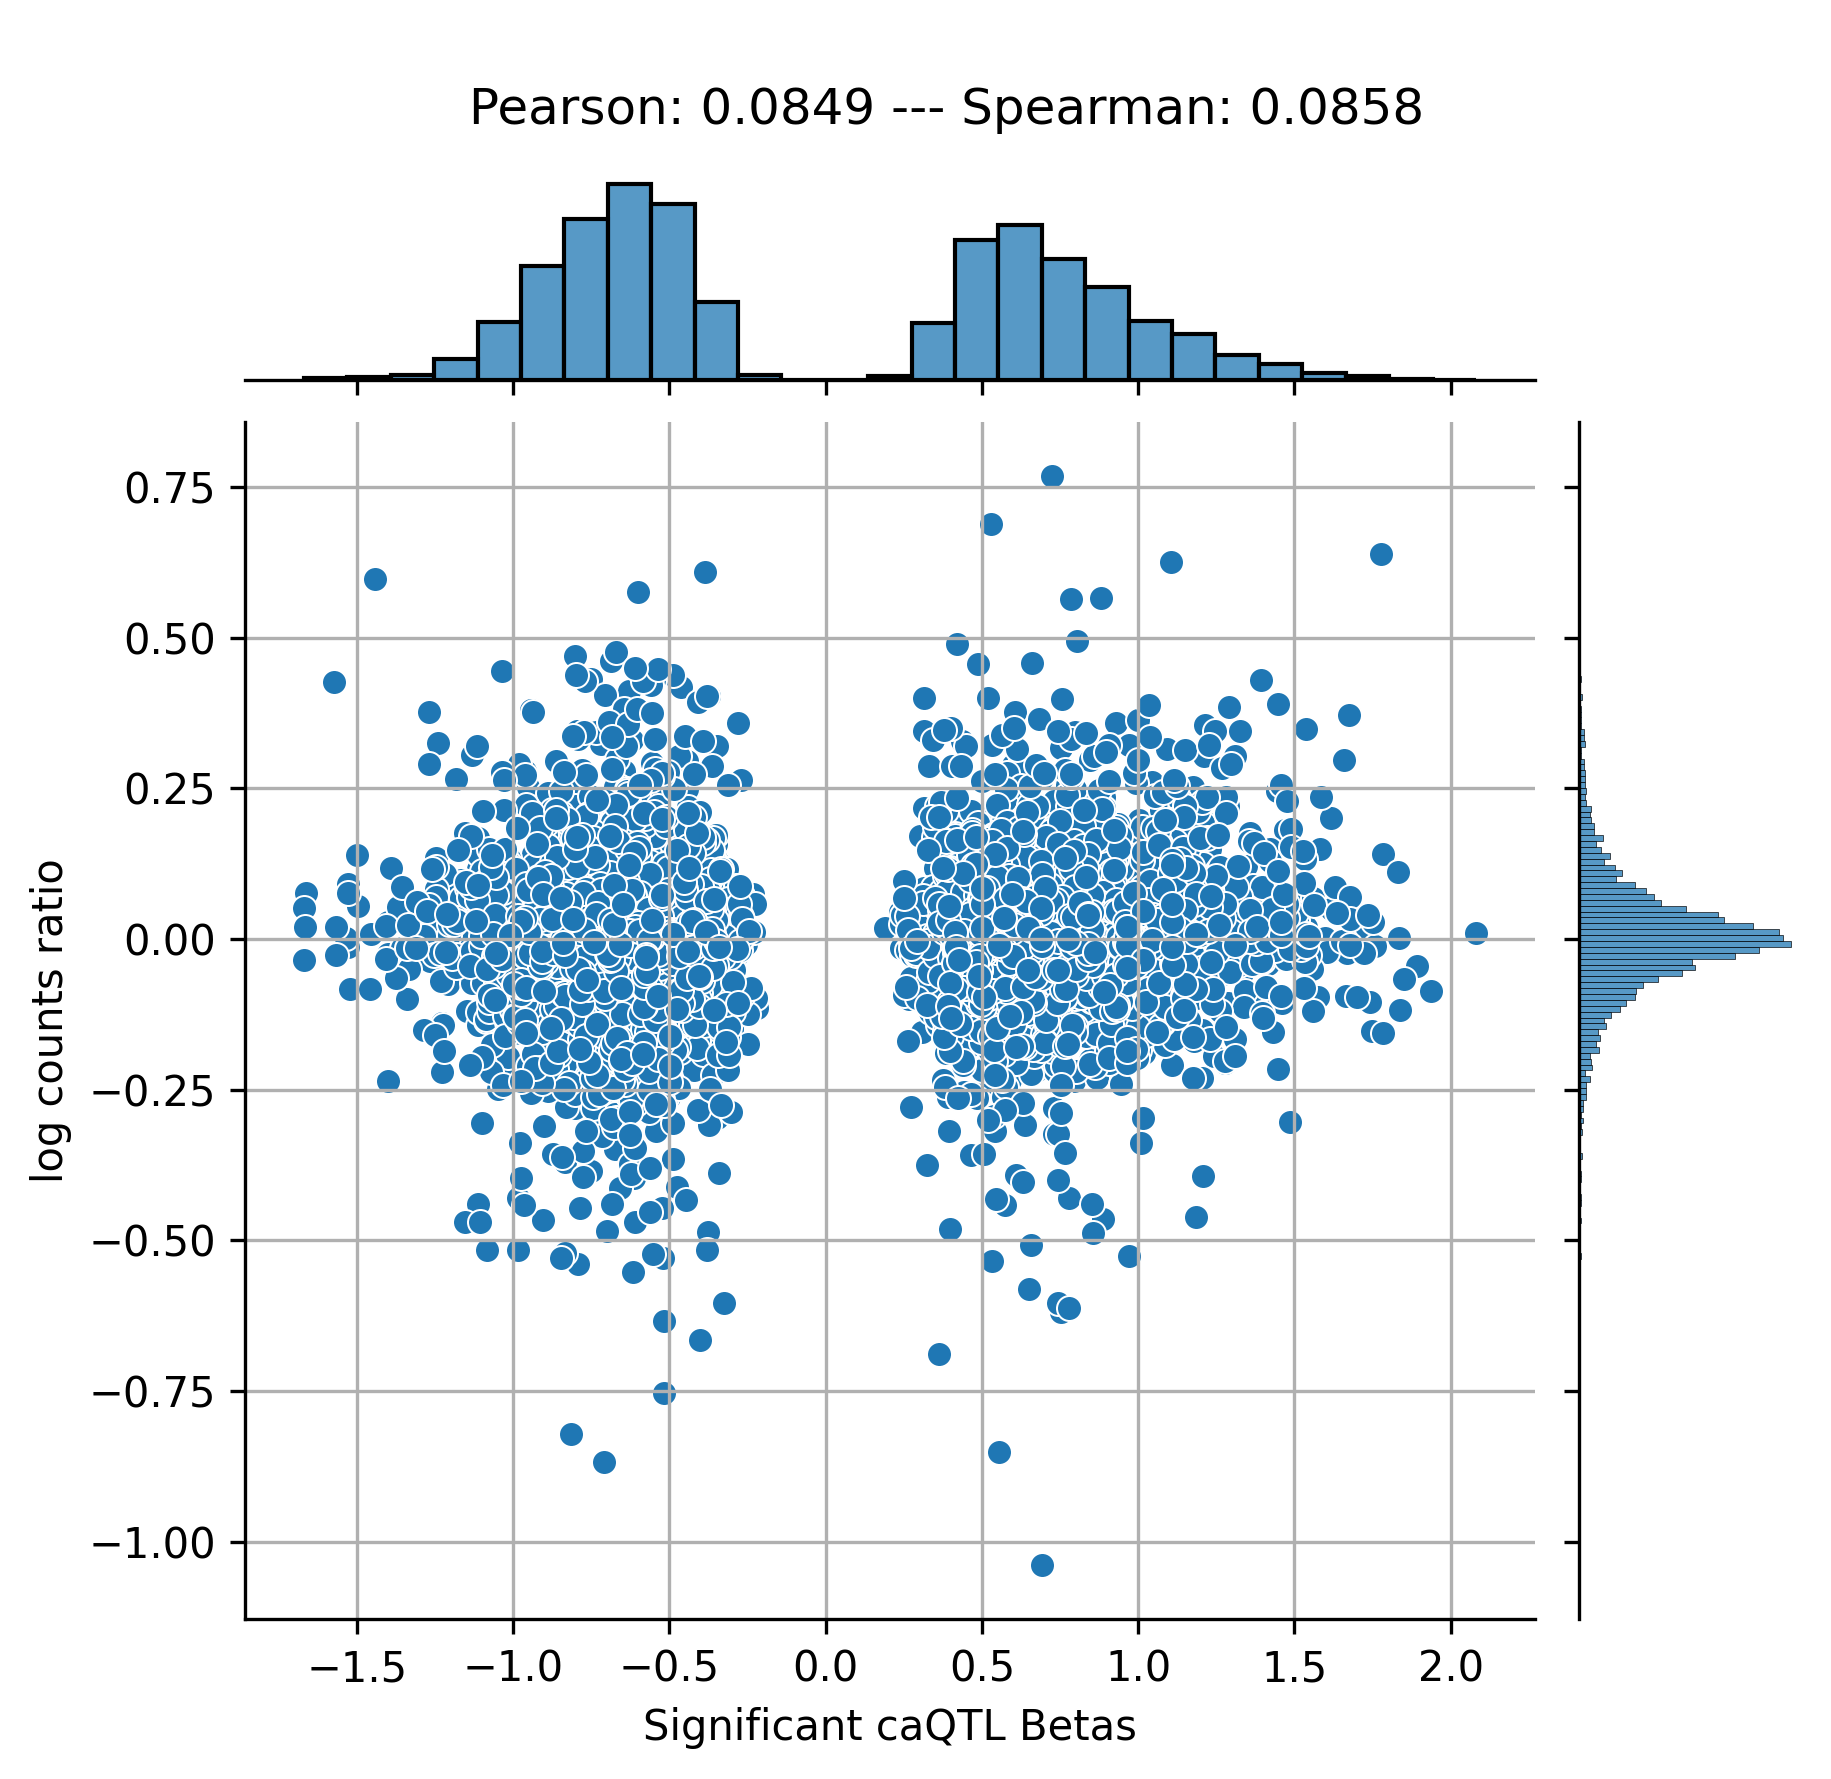

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.0
Caduceus African Significant caQTLs


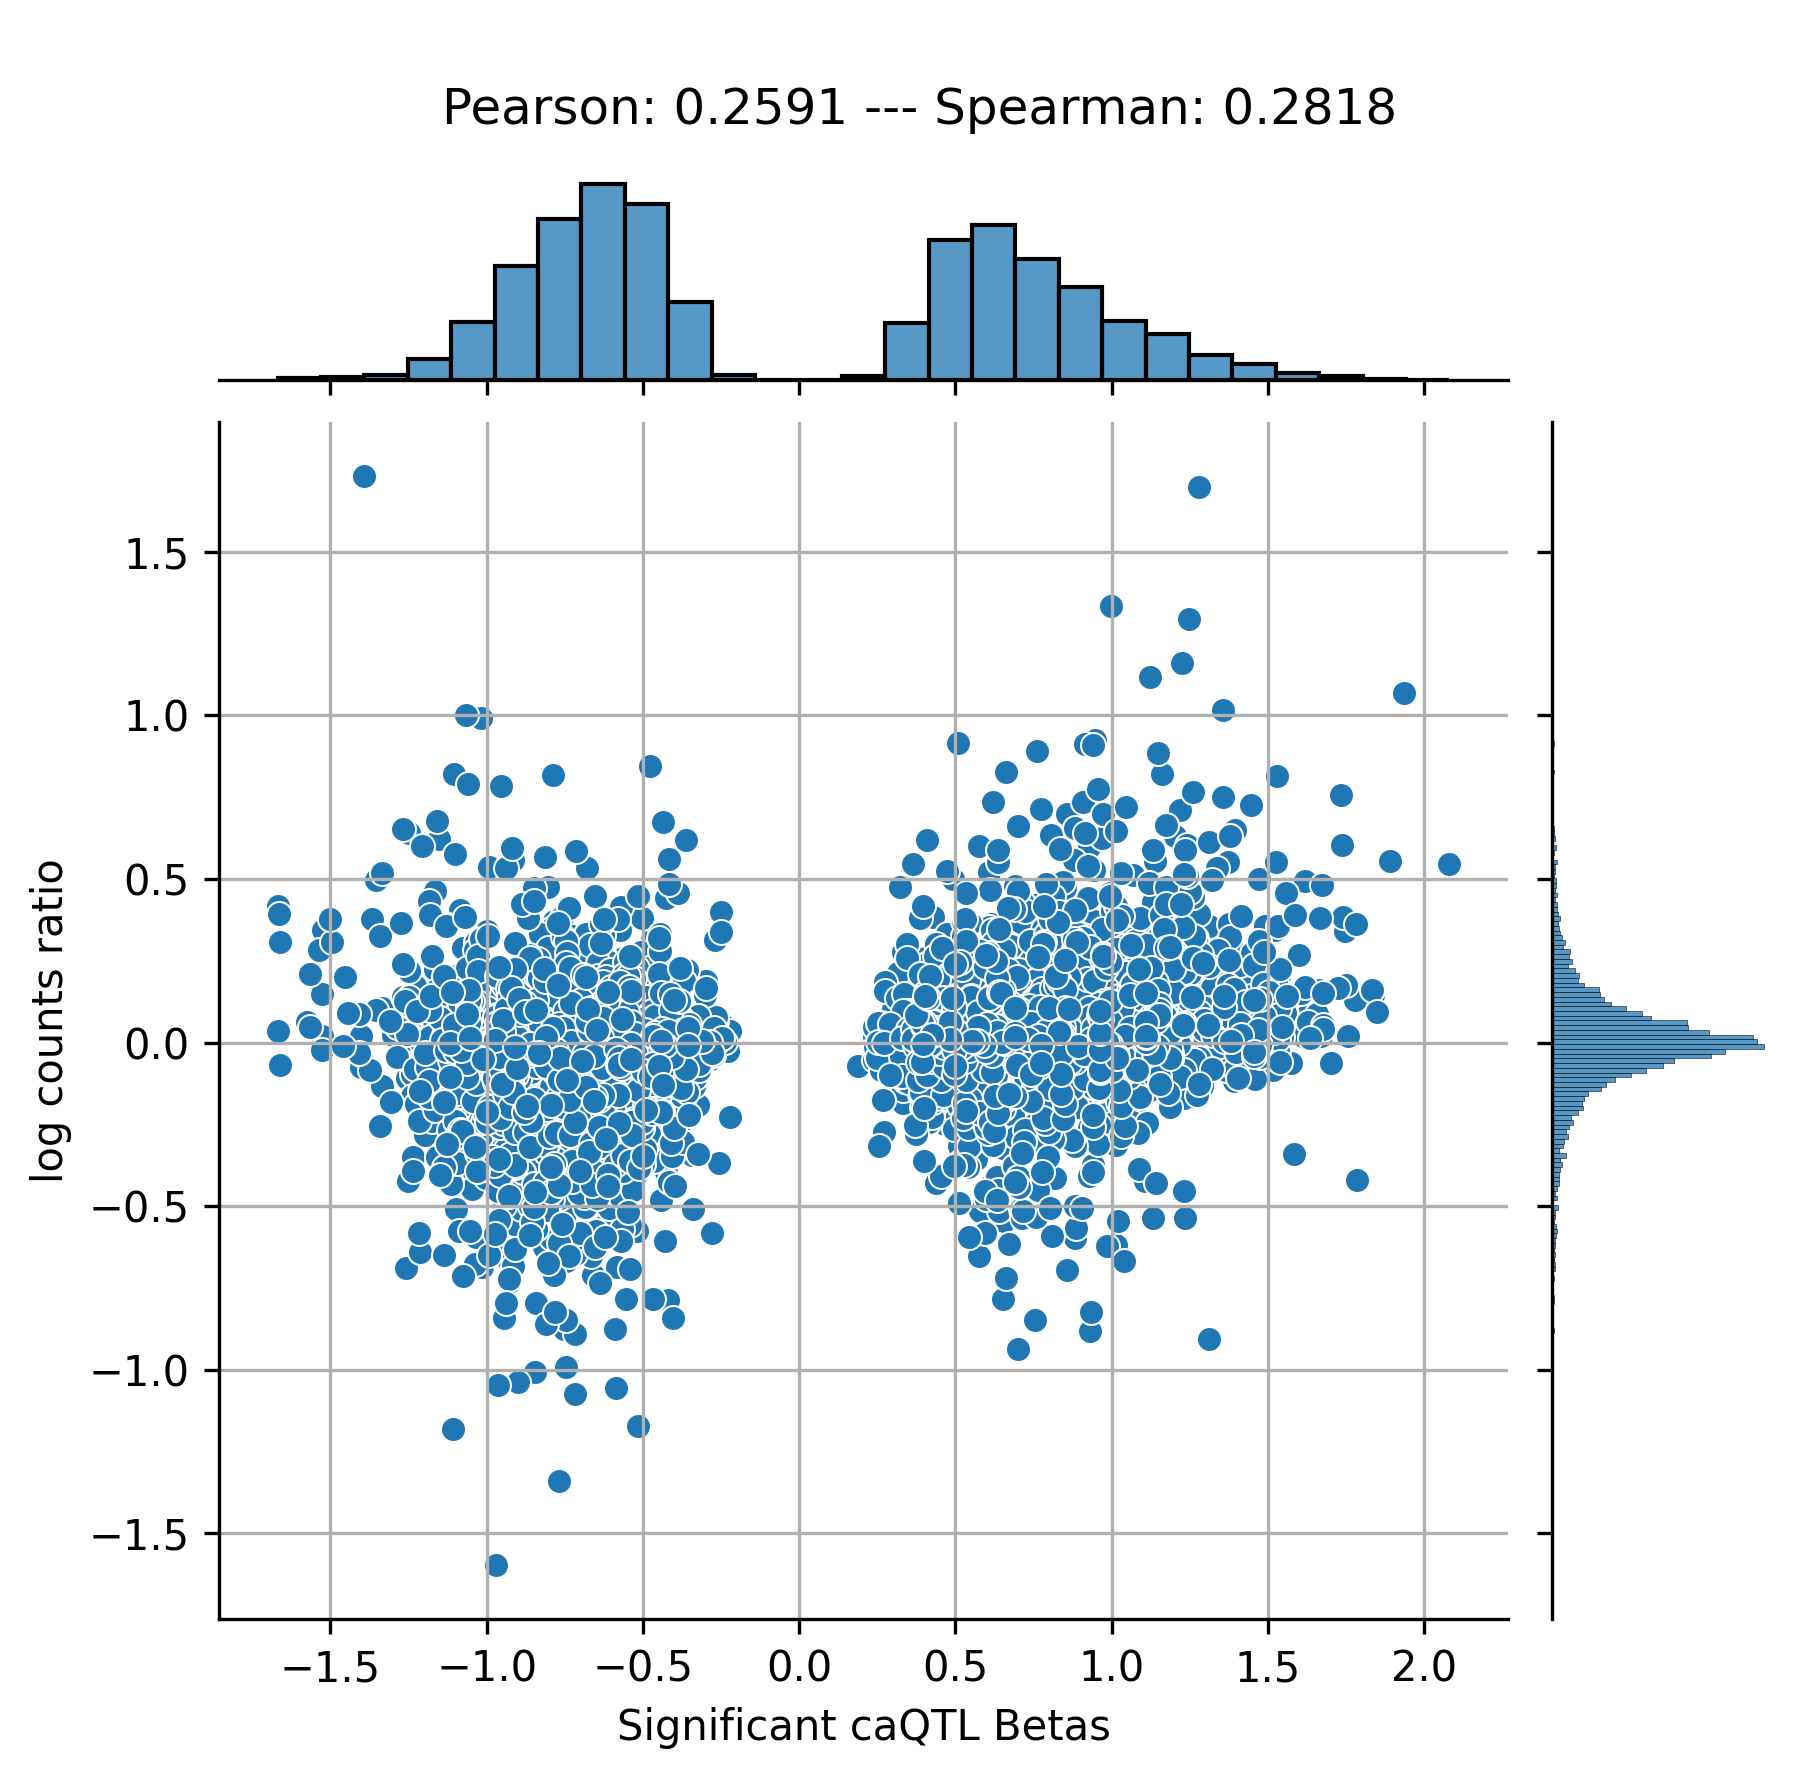

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
DNABert2 Yoruba Significant dsQTLs


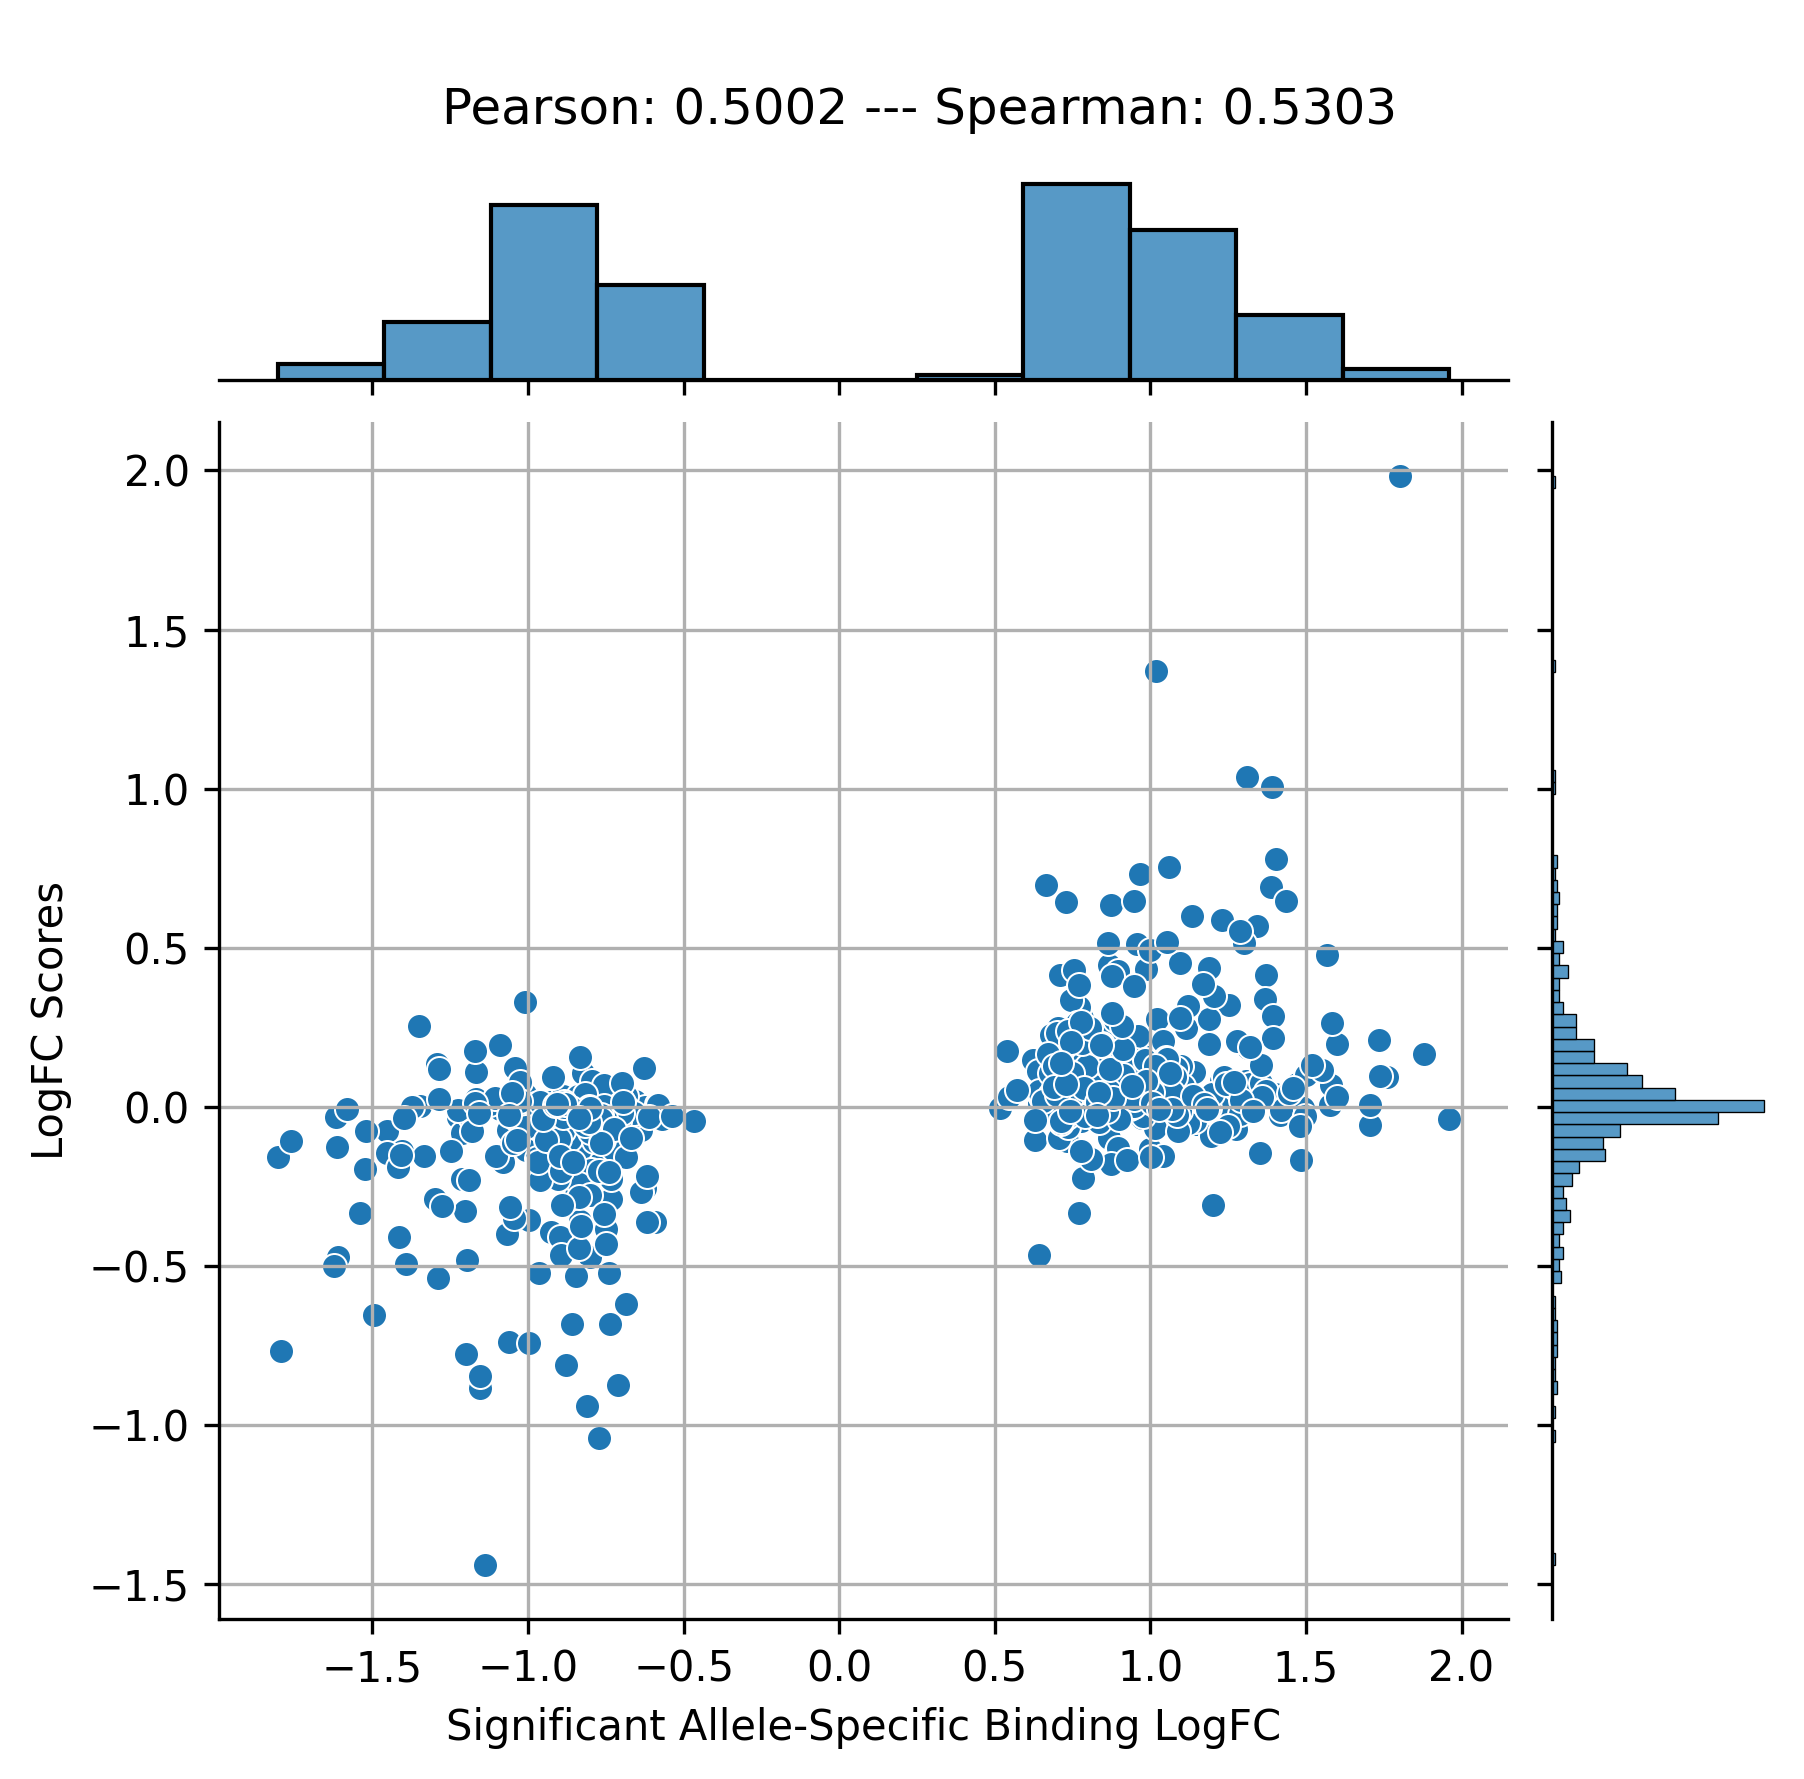

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Gena LM Yoruba Significant dsQTLs


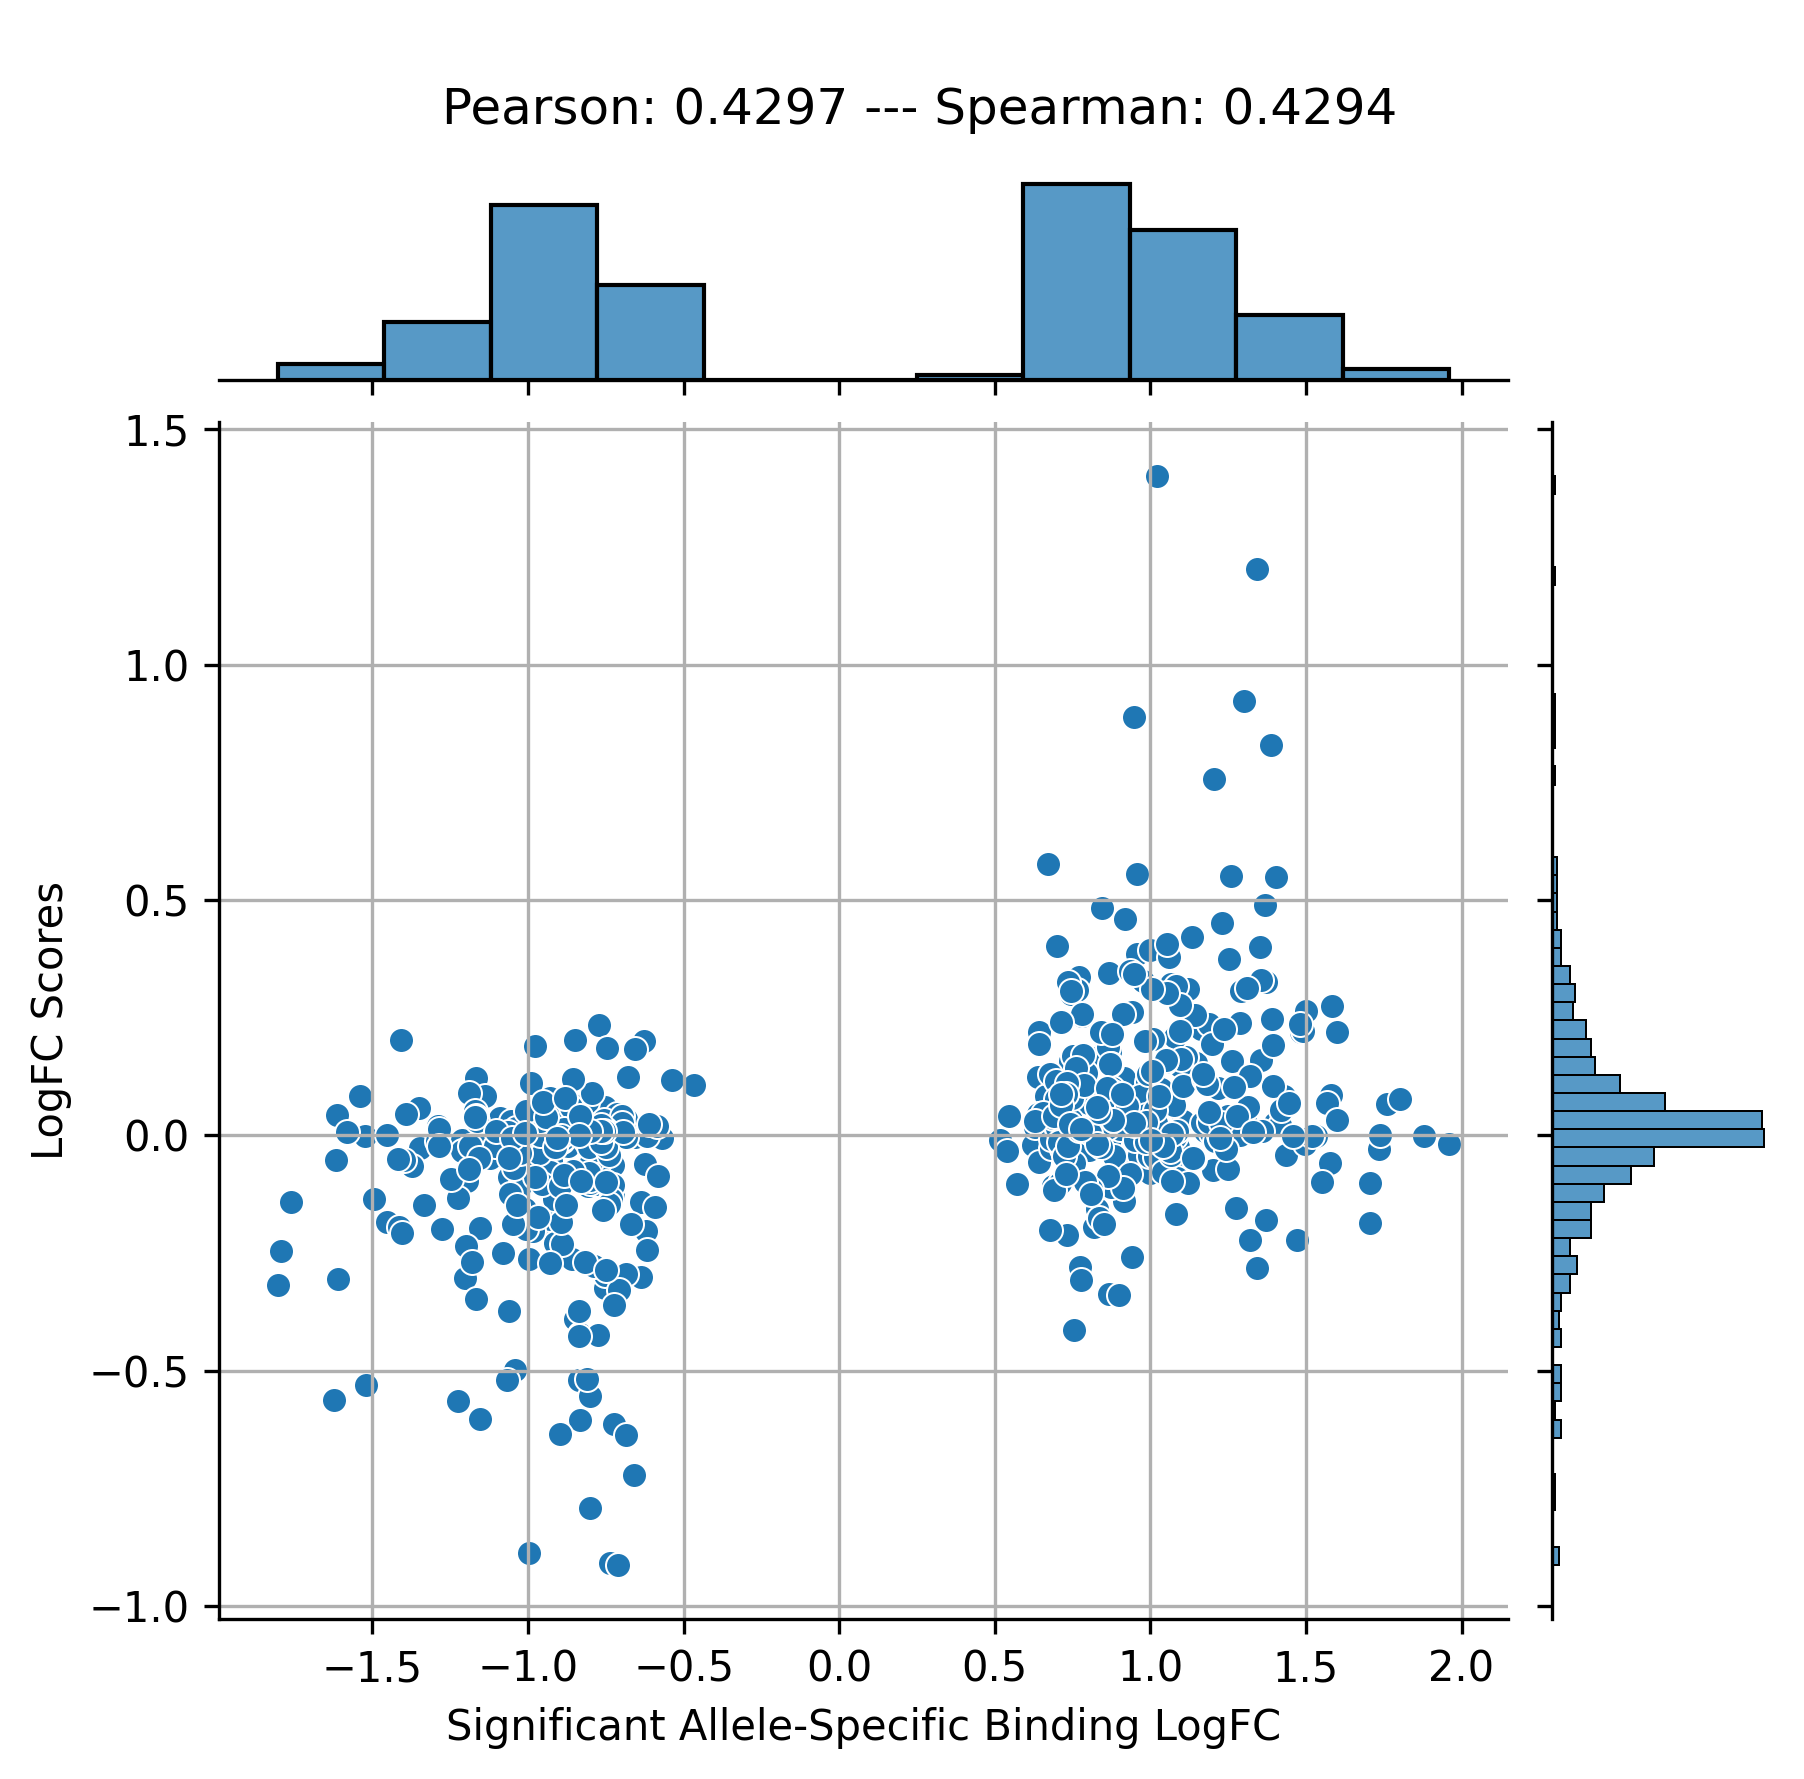

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
HyenaDNA Yoruba Significant dsQTLs


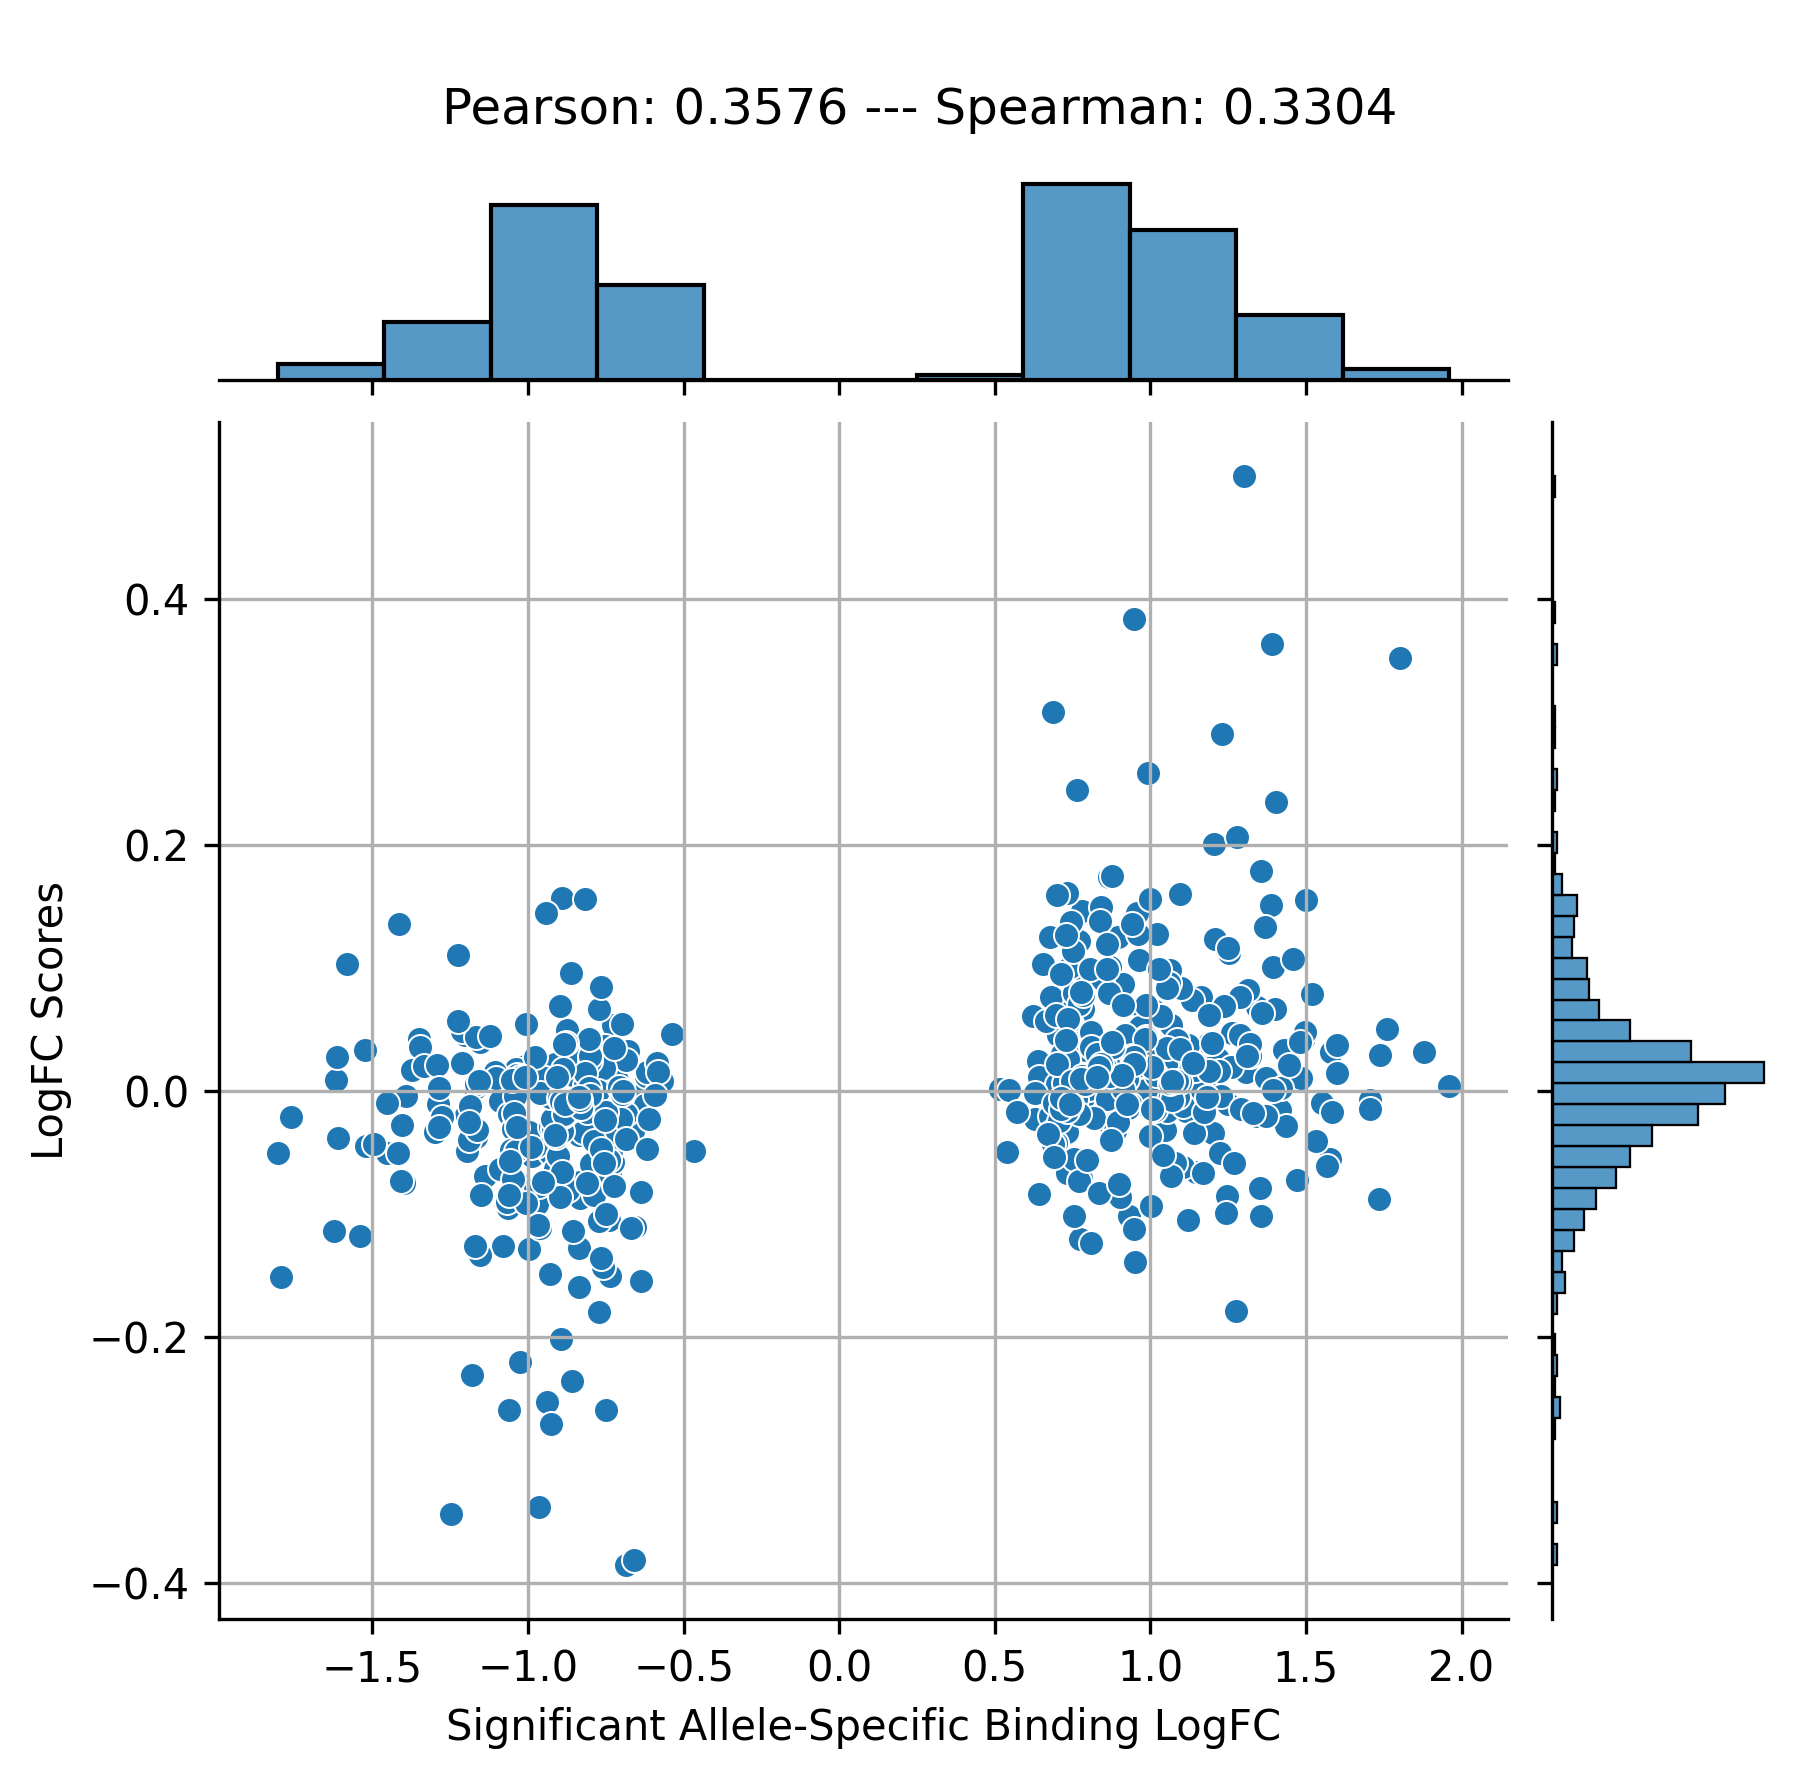

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Nucleotide Transformer Yoruba Significant dsQTLs


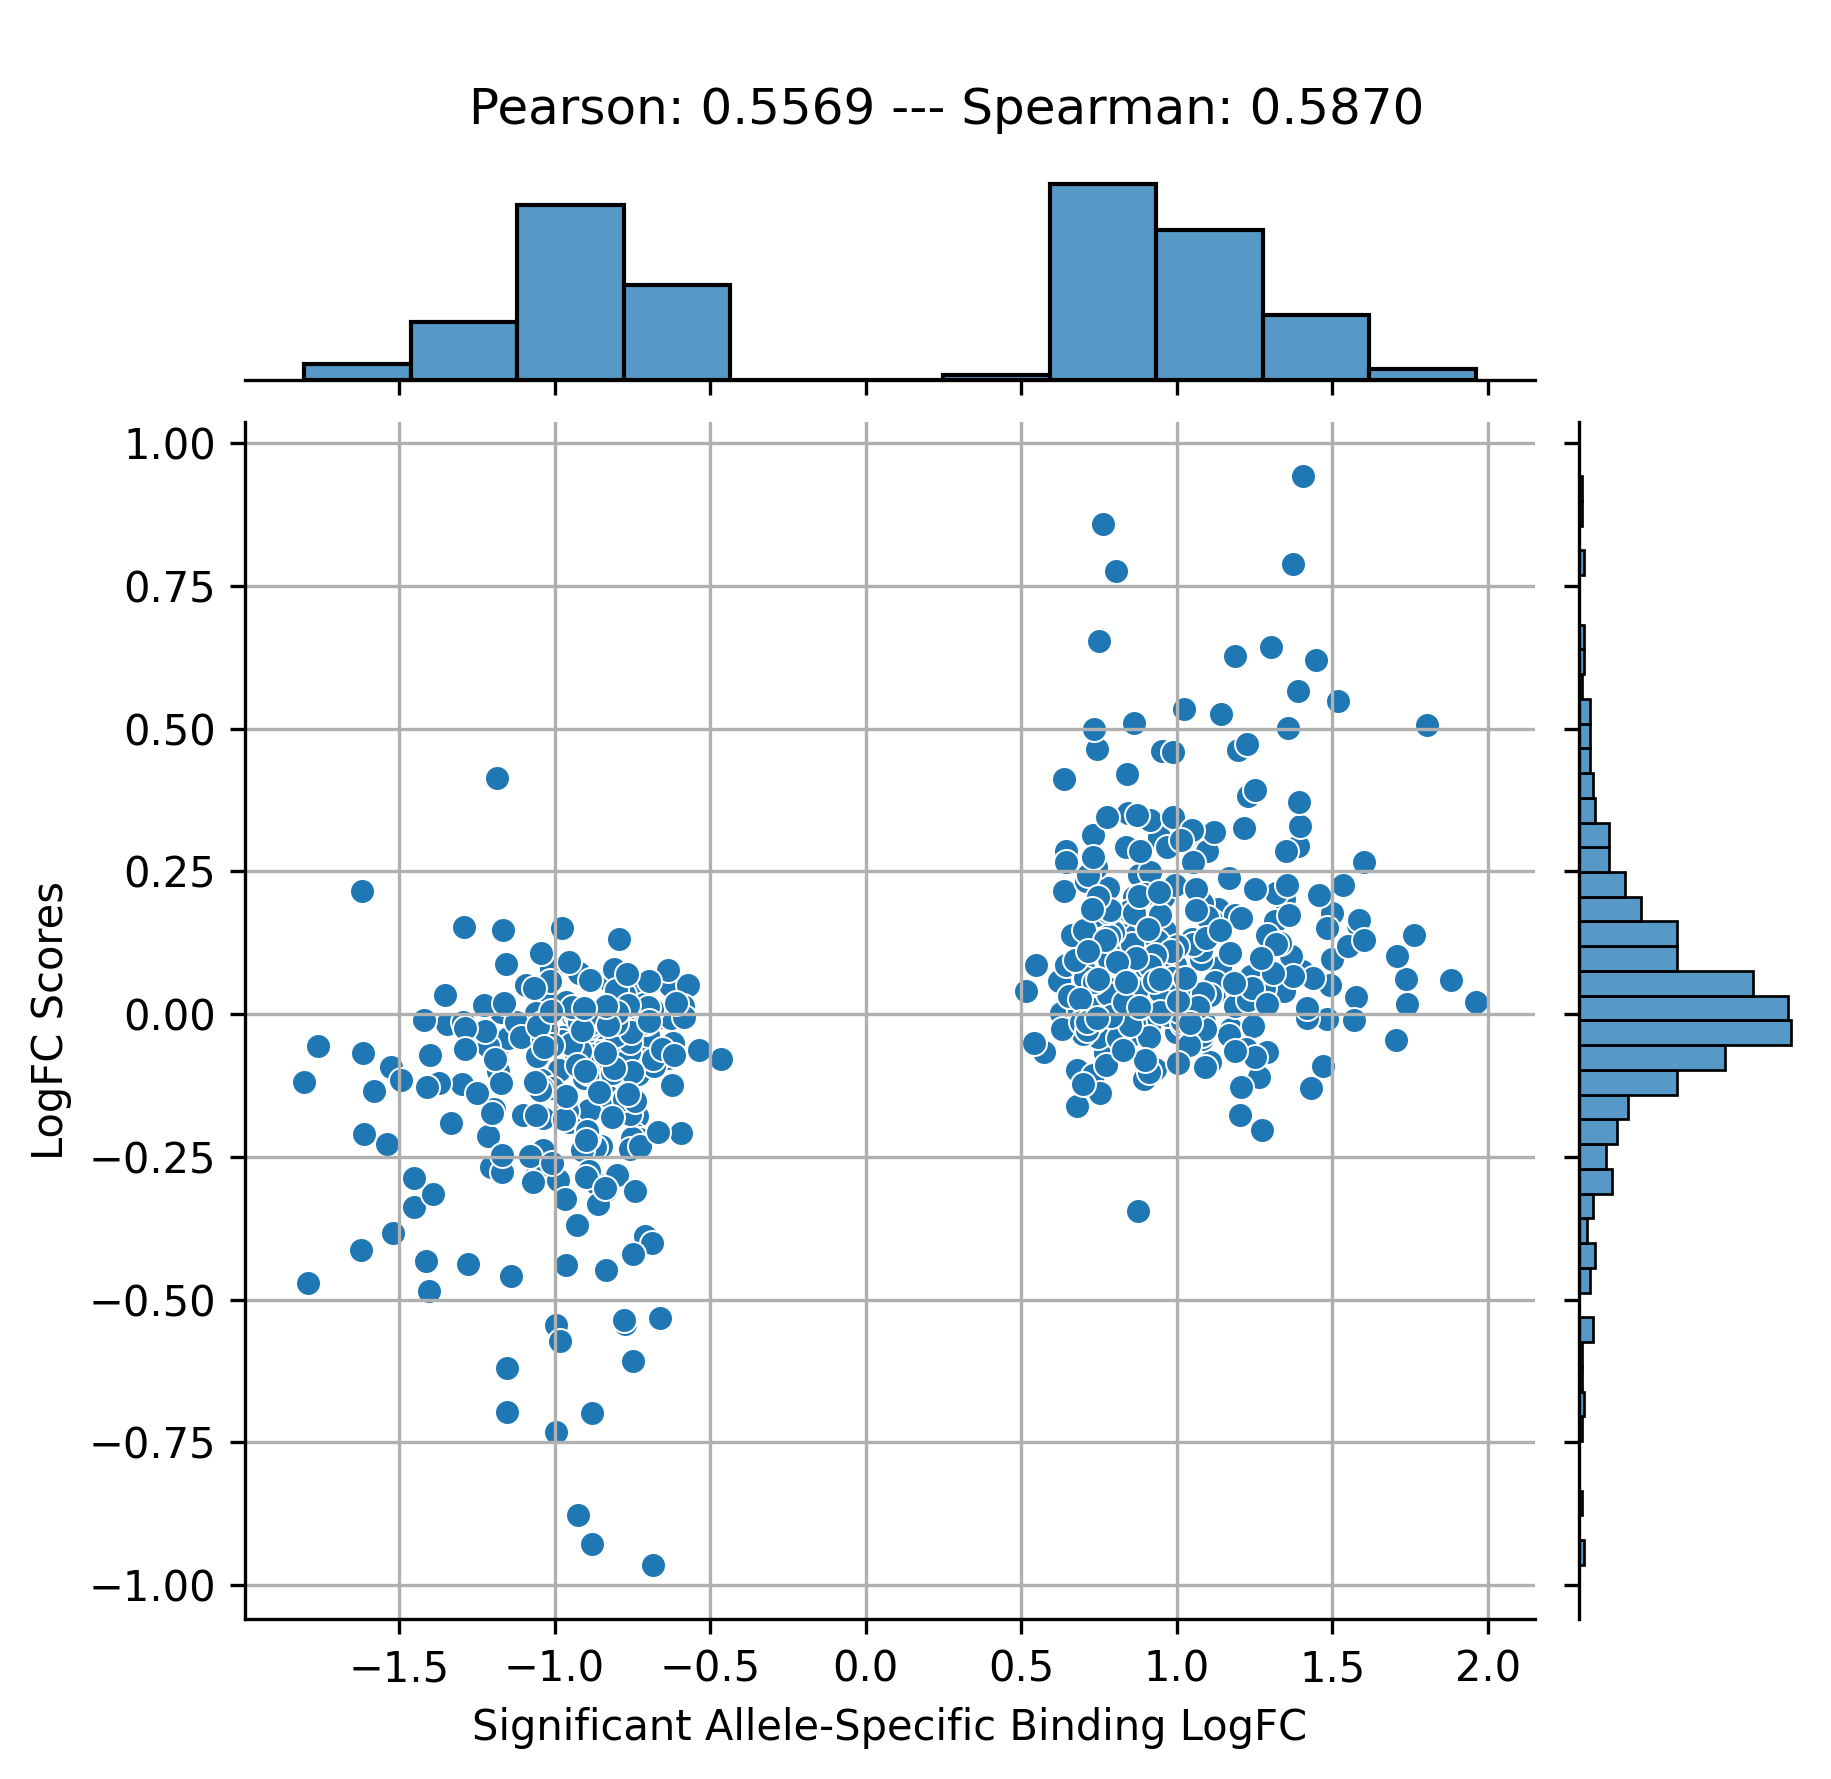

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Mistral DNA Yoruba Significant dsQTLs


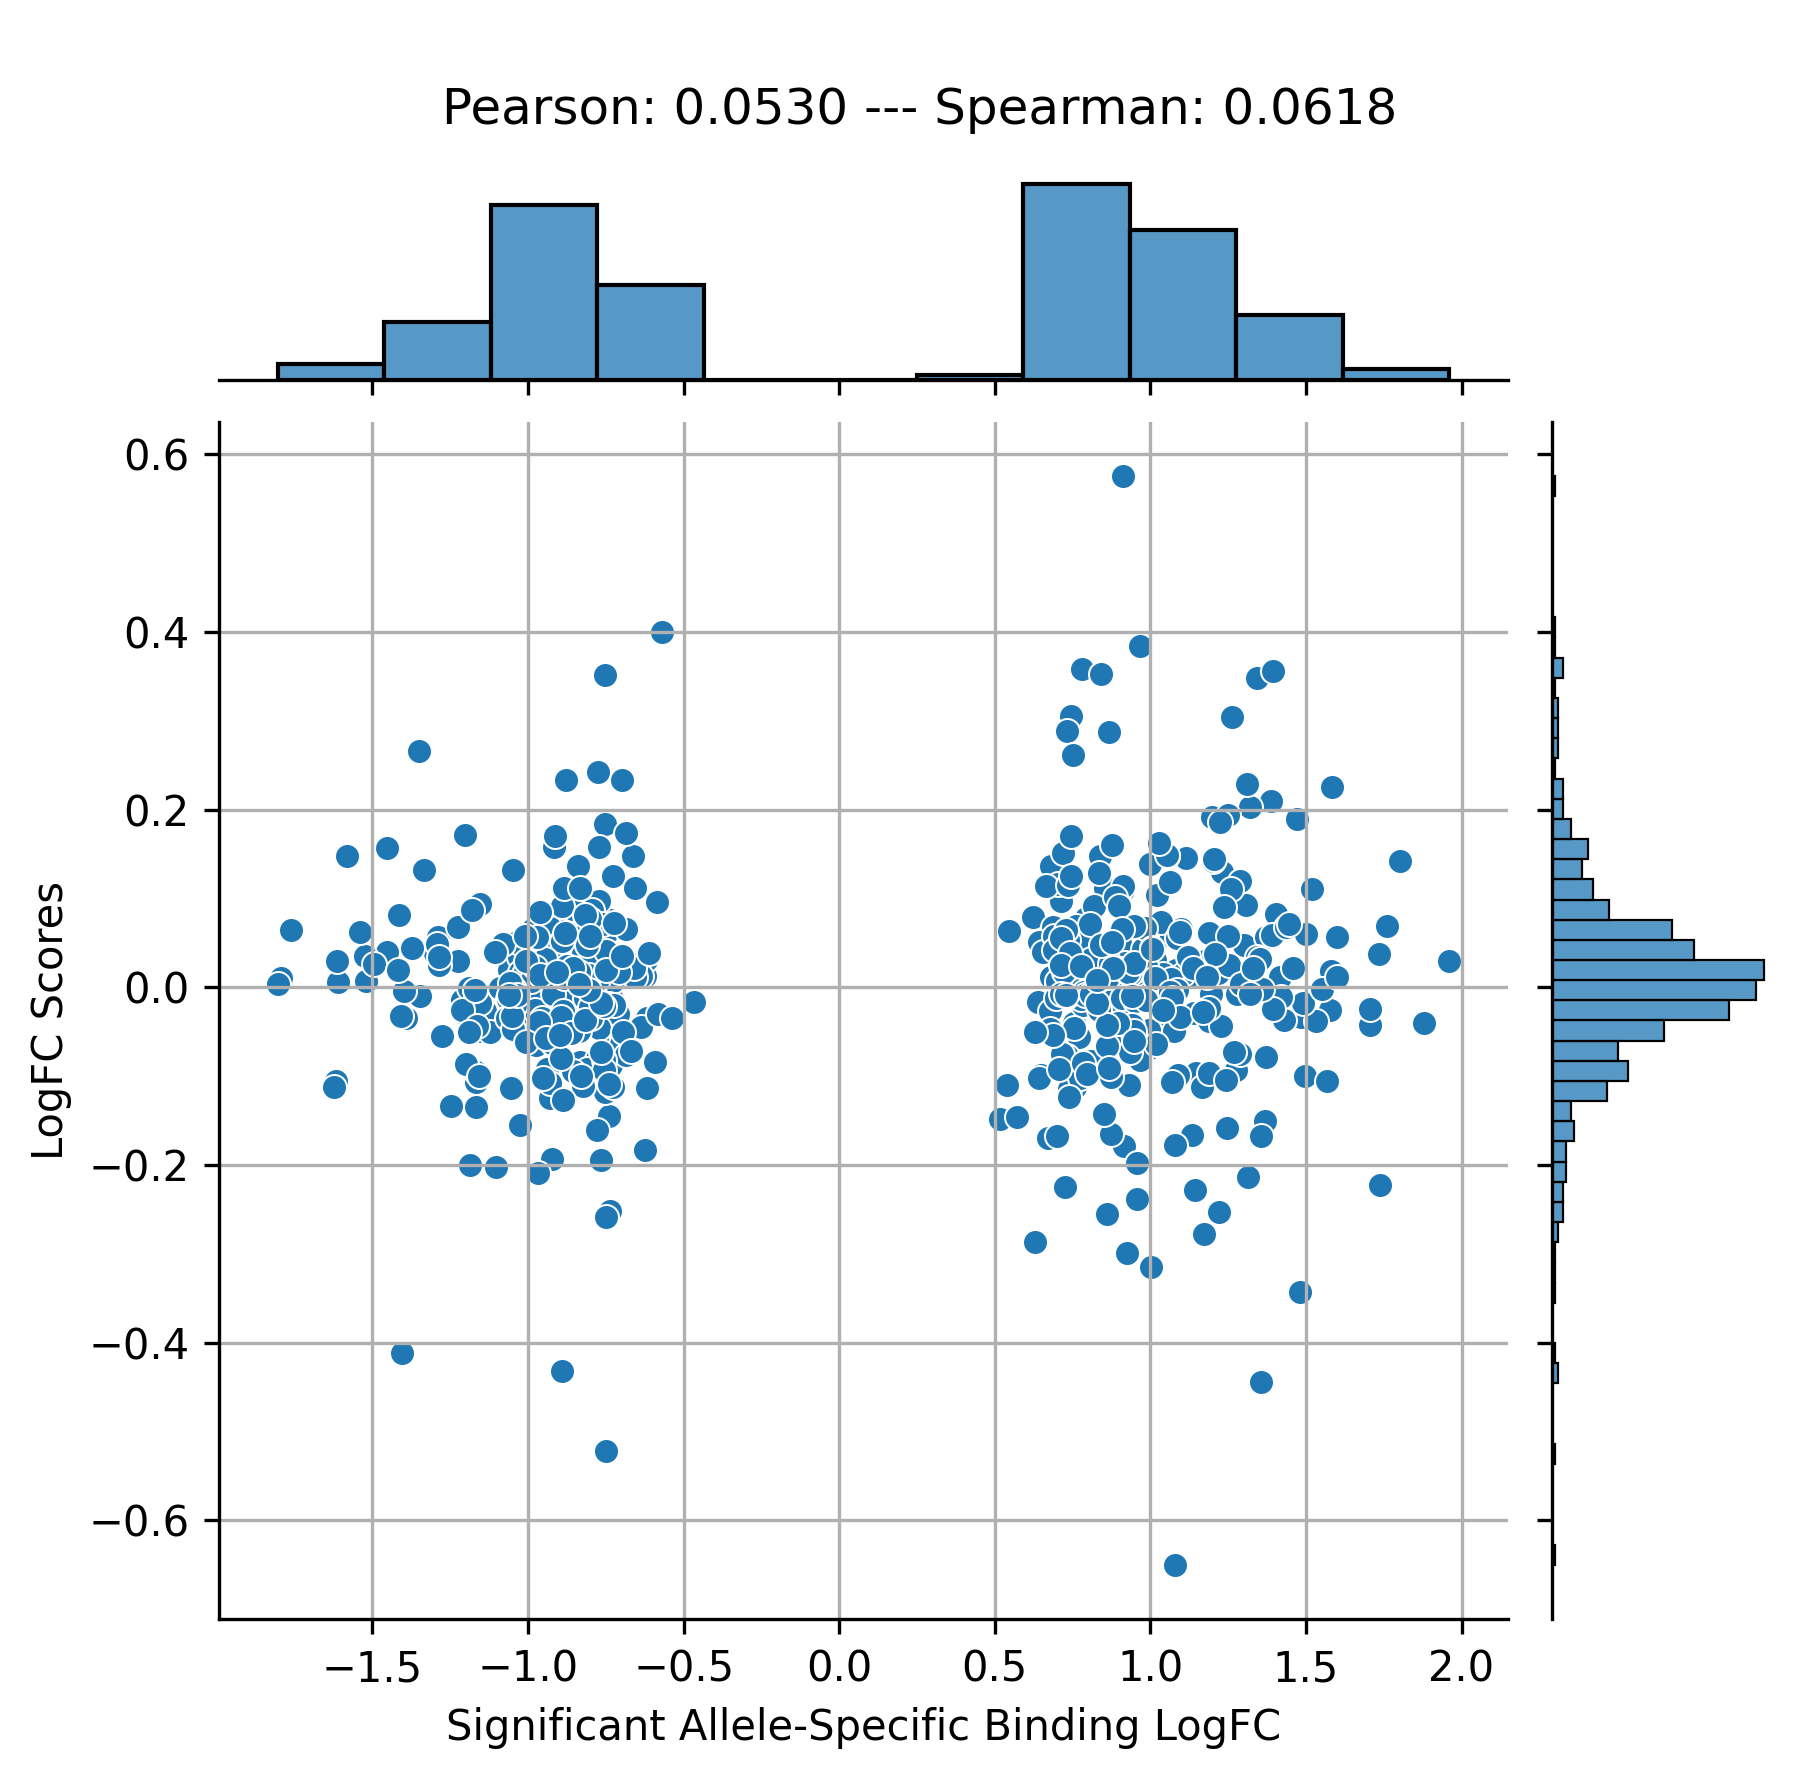

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Caduceus Yoruba Significant dsQTLs


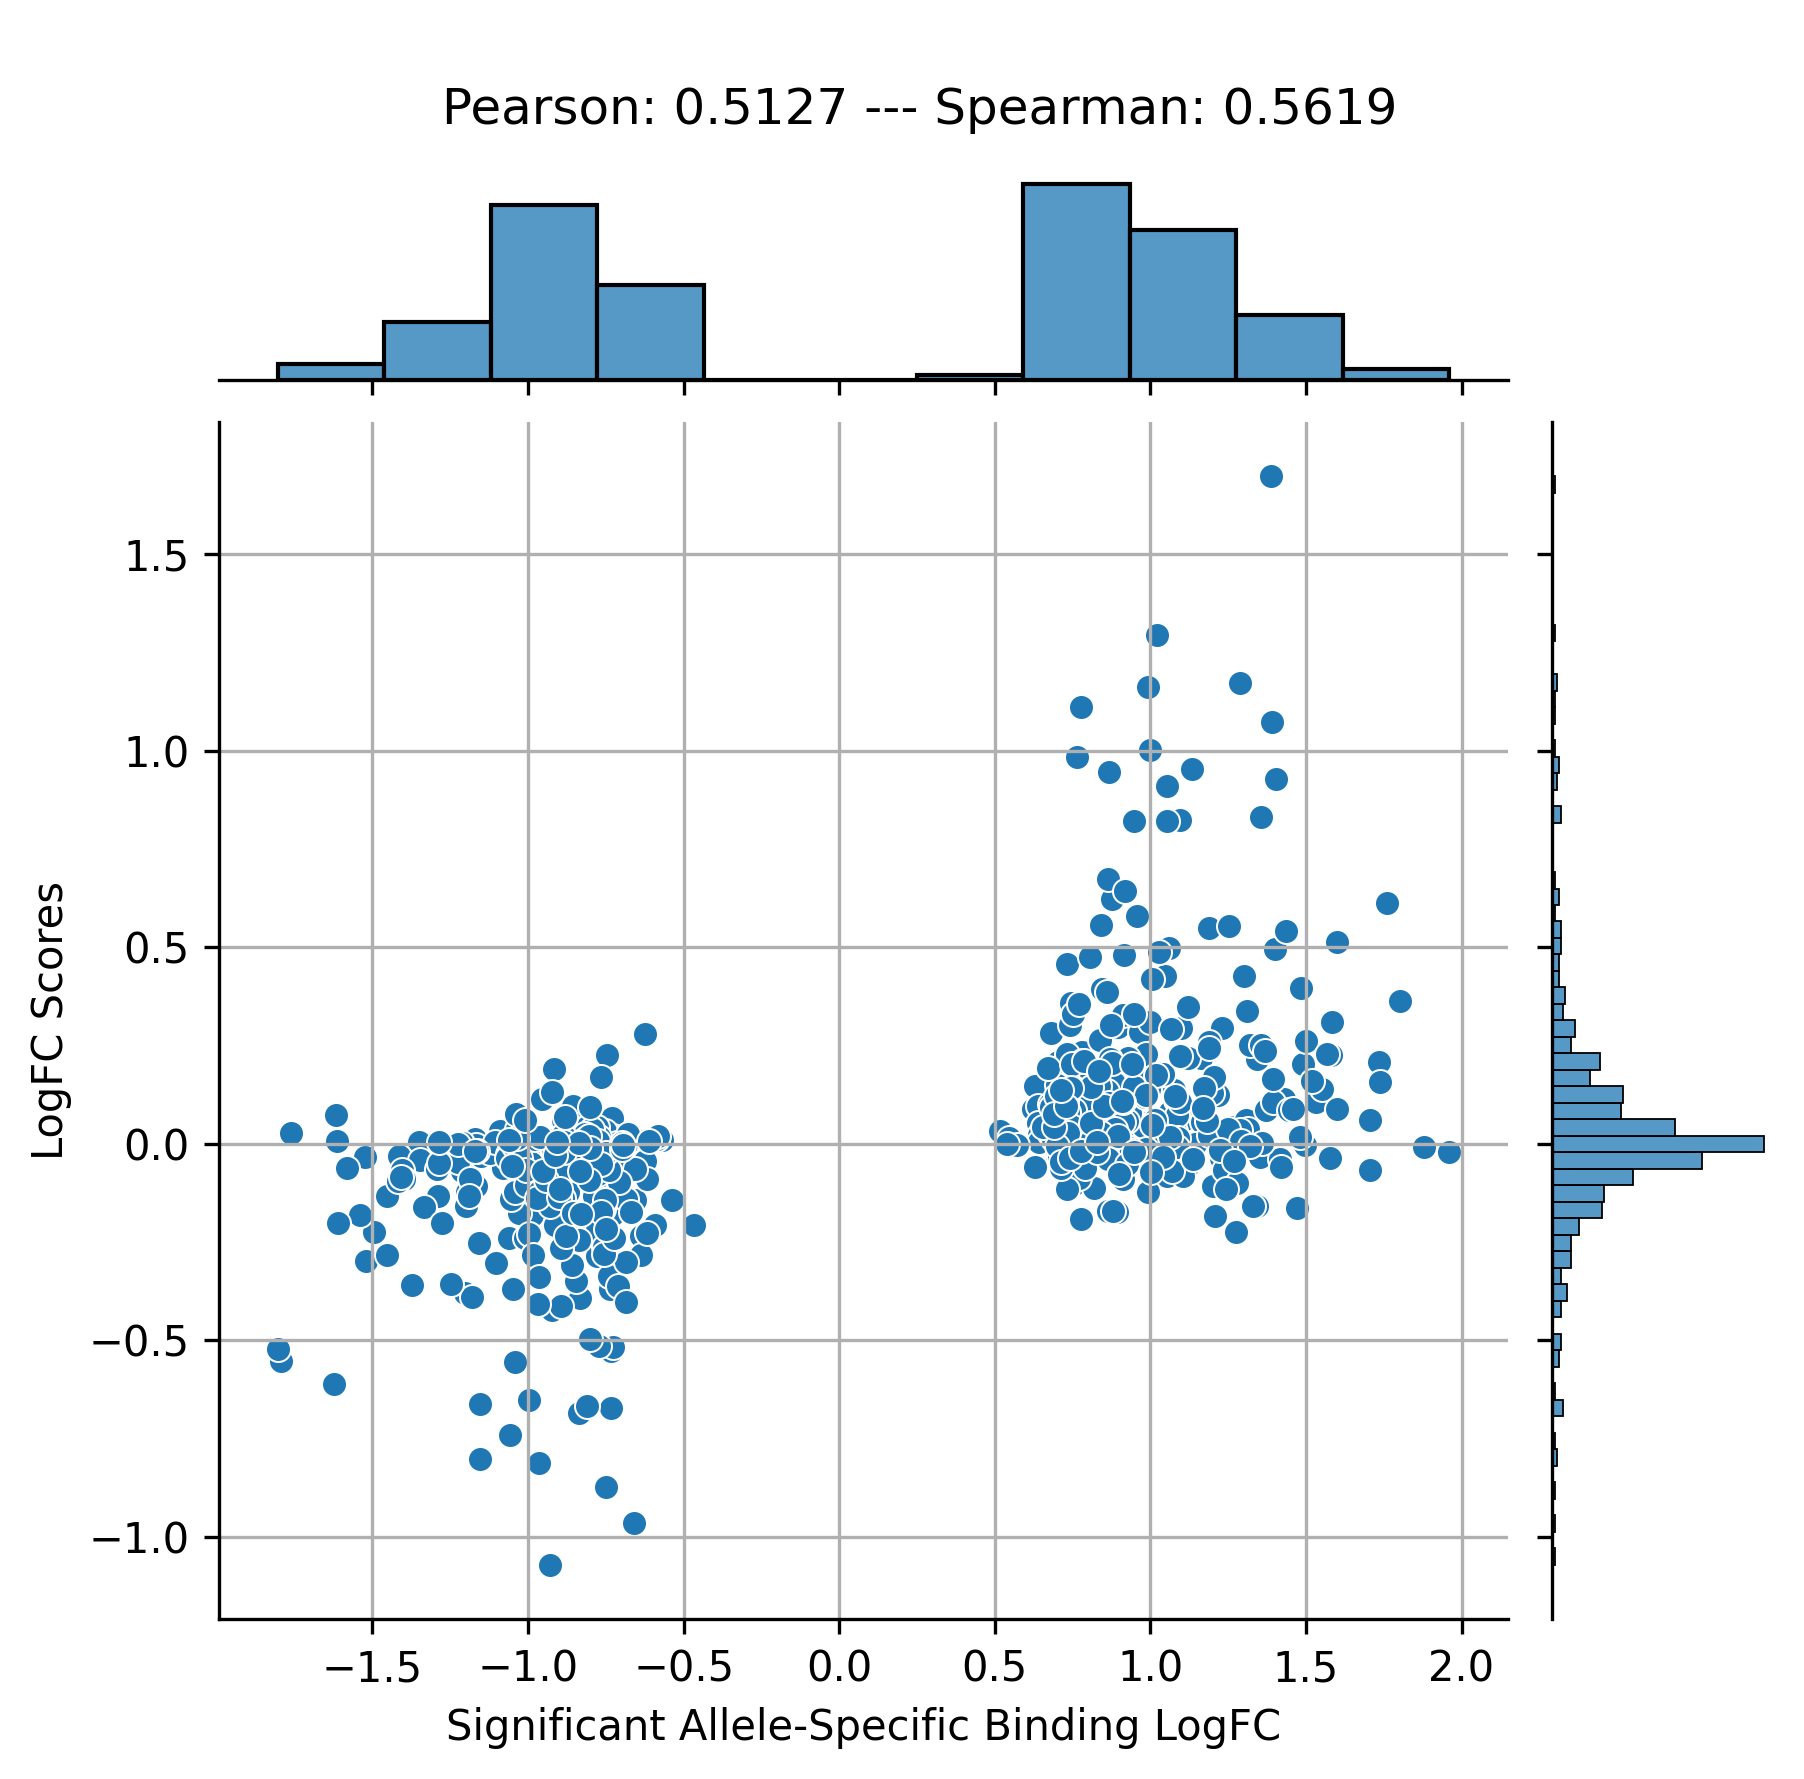

In [4]:
model_names=["DNABERT-2-117M", "gena-lm-bert-large-t2t", "hyenadna-large-1m-seqlen-hf",
             "nucleotide-transformer-v2-500m-multi-species", "Mistral-DNA-v1-1.6B-hg38", "caduceus-ps_seqlen-131k_d_model-256_n_layer-16"]
models=["DNABert2", "Gena LM", "HyenaDNA", "Nucleotide Transformer", "Mistral DNA", "Caduceus"]
model_path = os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/fine_tuned")

afr_counts_pvals = []
afr_counts_auprc = []
afr_counts_auroc = []
afr_counts_pearson = []
afr_counts_spearman = []

yoruba_counts_pvals = []
yoruba_counts_auprc = []
yoruba_counts_auroc = []
yoruba_counts_pearson = []
yoruba_counts_spearman = []

for model_name, model in zip(model_names, models):
    filtered_var_afr_caQTLs_df_ctrl, filtered_var_afr_caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(f"{model_path}/{model_name}/Afr.CaQTLS.counts.tsv")
    filtered_var_afr_caQTLs_df_ctrl, ctrl_afr_counts = compute_change(filtered_var_afr_caQTLs_df_ctrl)
    filtered_var_afr_caQTLs_df_sig, sig_afr_counts = compute_change(filtered_var_afr_caQTLs_df_sig)
    afr_stat, afr_pval = mannwhitneyu(ctrl_afr_counts, sig_afr_counts, alternative="less")
    afr_counts_pvals += [afr_pval]
    print("African caQTL Mann Whitney pVal:", afr_pval)
    print(f"{model} African Significant caQTLs")
    pearson, spearman = beta_logfc(filtered_var_afr_caQTLs_df_sig, "", "log counts ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_afr_counts, sig_afr_counts)
    afr_counts_auprc += [auprc]
    afr_counts_auroc += [auroc]
    afr_counts_pearson += [pearson]
    afr_counts_spearman += [spearman]
    

for model_name, model in zip(model_names, models):    
    filtered_var_yoruba_caQTLs_df_ctrl, filtered_var_yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(f"{model_path}/{model_name}/yoruban.dsqtls.counts.tsv")    
    filtered_var_yoruba_caQTLs_df_ctrl, ctrl_yoruba_counts = compute_change(filtered_var_yoruba_caQTLs_df_ctrl, True)
    filtered_var_yoruba_caQTLs_df_sig, sig_yoruba_counts = compute_change(filtered_var_yoruba_caQTLs_df_sig, True)
    yoruba_stat, yoruba_pval = mannwhitneyu(ctrl_yoruba_counts, sig_yoruba_counts, alternative="less")
    yoruba_counts_pvals += [yoruba_pval]
    print(f"{model} Yoruba Significant dsQTLs")
    pearson, spearman = est_size_logfc(filtered_var_yoruba_caQTLs_df_sig, "", "log counts ratio")
    auprc, auroc = get_precision_recall_auc(ctrl_yoruba_counts, sig_yoruba_counts)
    yoruba_counts_auprc += [auprc]
    yoruba_counts_auroc += [auroc]
    yoruba_counts_pearson += [pearson]
    yoruba_counts_spearman += [spearman]

In [5]:
ctrl_yoruba_counts

575      0.035027
576      0.060447
577      0.055646
578      0.066254
579      0.015186
           ...   
28302    0.050015
28303    0.161761
28304    0.093833
28305    0.059505
28307    0.063073
Name: llm_logfc, Length: 26813, dtype: float64

In [6]:
from tabulate import tabulate
mydata = [
    afr_counts_pearson,
    afr_counts_spearman,
    afr_counts_auroc,
    afr_counts_auprc,
    afr_counts_pvals,
]

index = [ "African Pearson", "African Spearman", "African AUROC", "African AUPRC", "African P value"]

mydata = [[i] + row for i, row in zip(index, mydata)]
# my_data = np.transpose(mydata)

print(tabulate(mydata, headers=models, tablefmt="grid"))

+------------------+------------+--------------+--------------+--------------------------+---------------+------------+
|                  |   DNABert2 |      Gena LM |     HyenaDNA |   Nucleotide Transformer |   Mistral DNA |   Caduceus |
+==================+============+==============+==============+==========================+===============+============+
| African Pearson  |   0.209476 | 0.200959     | 0.216682     |             0.255095     |    0.0849395  |   0.259128 |
+------------------+------------+--------------+--------------+--------------------------+---------------+------------+
| African Spearman |   0.242486 | 0.218722     | 0.228395     |             0.25172      |    0.0857805  |   0.281835 |
+------------------+------------+--------------+--------------+--------------------------+---------------+------------+
| African AUROC    |   0.638477 | 0.614668     | 0.584478     |             0.622537     |    0.510128   |   0.649762 |
+------------------+------------+-------

In [7]:
from tabulate import tabulate
mydata = [
    yoruba_counts_pearson,
    yoruba_counts_spearman,
    yoruba_counts_auroc,
    yoruba_counts_auprc,
    yoruba_counts_pvals,
]

index = [ "Yoruba Pearson", "Yoruba Spearman", "Yoruba AUROC","Yoruba AUPRC", "Yoruba P value"]

mydata = [[i] + row for i, row in zip(index, mydata)]

print(tabulate(mydata, headers=models, tablefmt="grid"))

+-----------------+-------------+-------------+------------+--------------------------+---------------+-------------+
|                 |    DNABert2 |     Gena LM |   HyenaDNA |   Nucleotide Transformer |   Mistral DNA |    Caduceus |
+=================+=============+=============+============+==========================+===============+=============+
| Yoruba Pearson  | 0.500171    | 0.429748    |  0.357638  |              0.556946    |     0.0530034 | 0.512694    |
+-----------------+-------------+-------------+------------+--------------------------+---------------+-------------+
| Yoruba Spearman | 0.530333    | 0.429356    |  0.330387  |              0.586995    |     0.0618205 | 0.56185     |
+-----------------+-------------+-------------+------------+--------------------------+---------------+-------------+
| Yoruba AUROC    | 0.649149    | 0.640905    |  0.499162  |              0.696988    |     0.5041    | 0.666356    |
+-----------------+-------------+-------------+---------

unique label values label
False    77999
True      6821
Name: count, dtype: int64


unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64
unique label values label
False    77999
True      6821
Name: count, dtype: int64


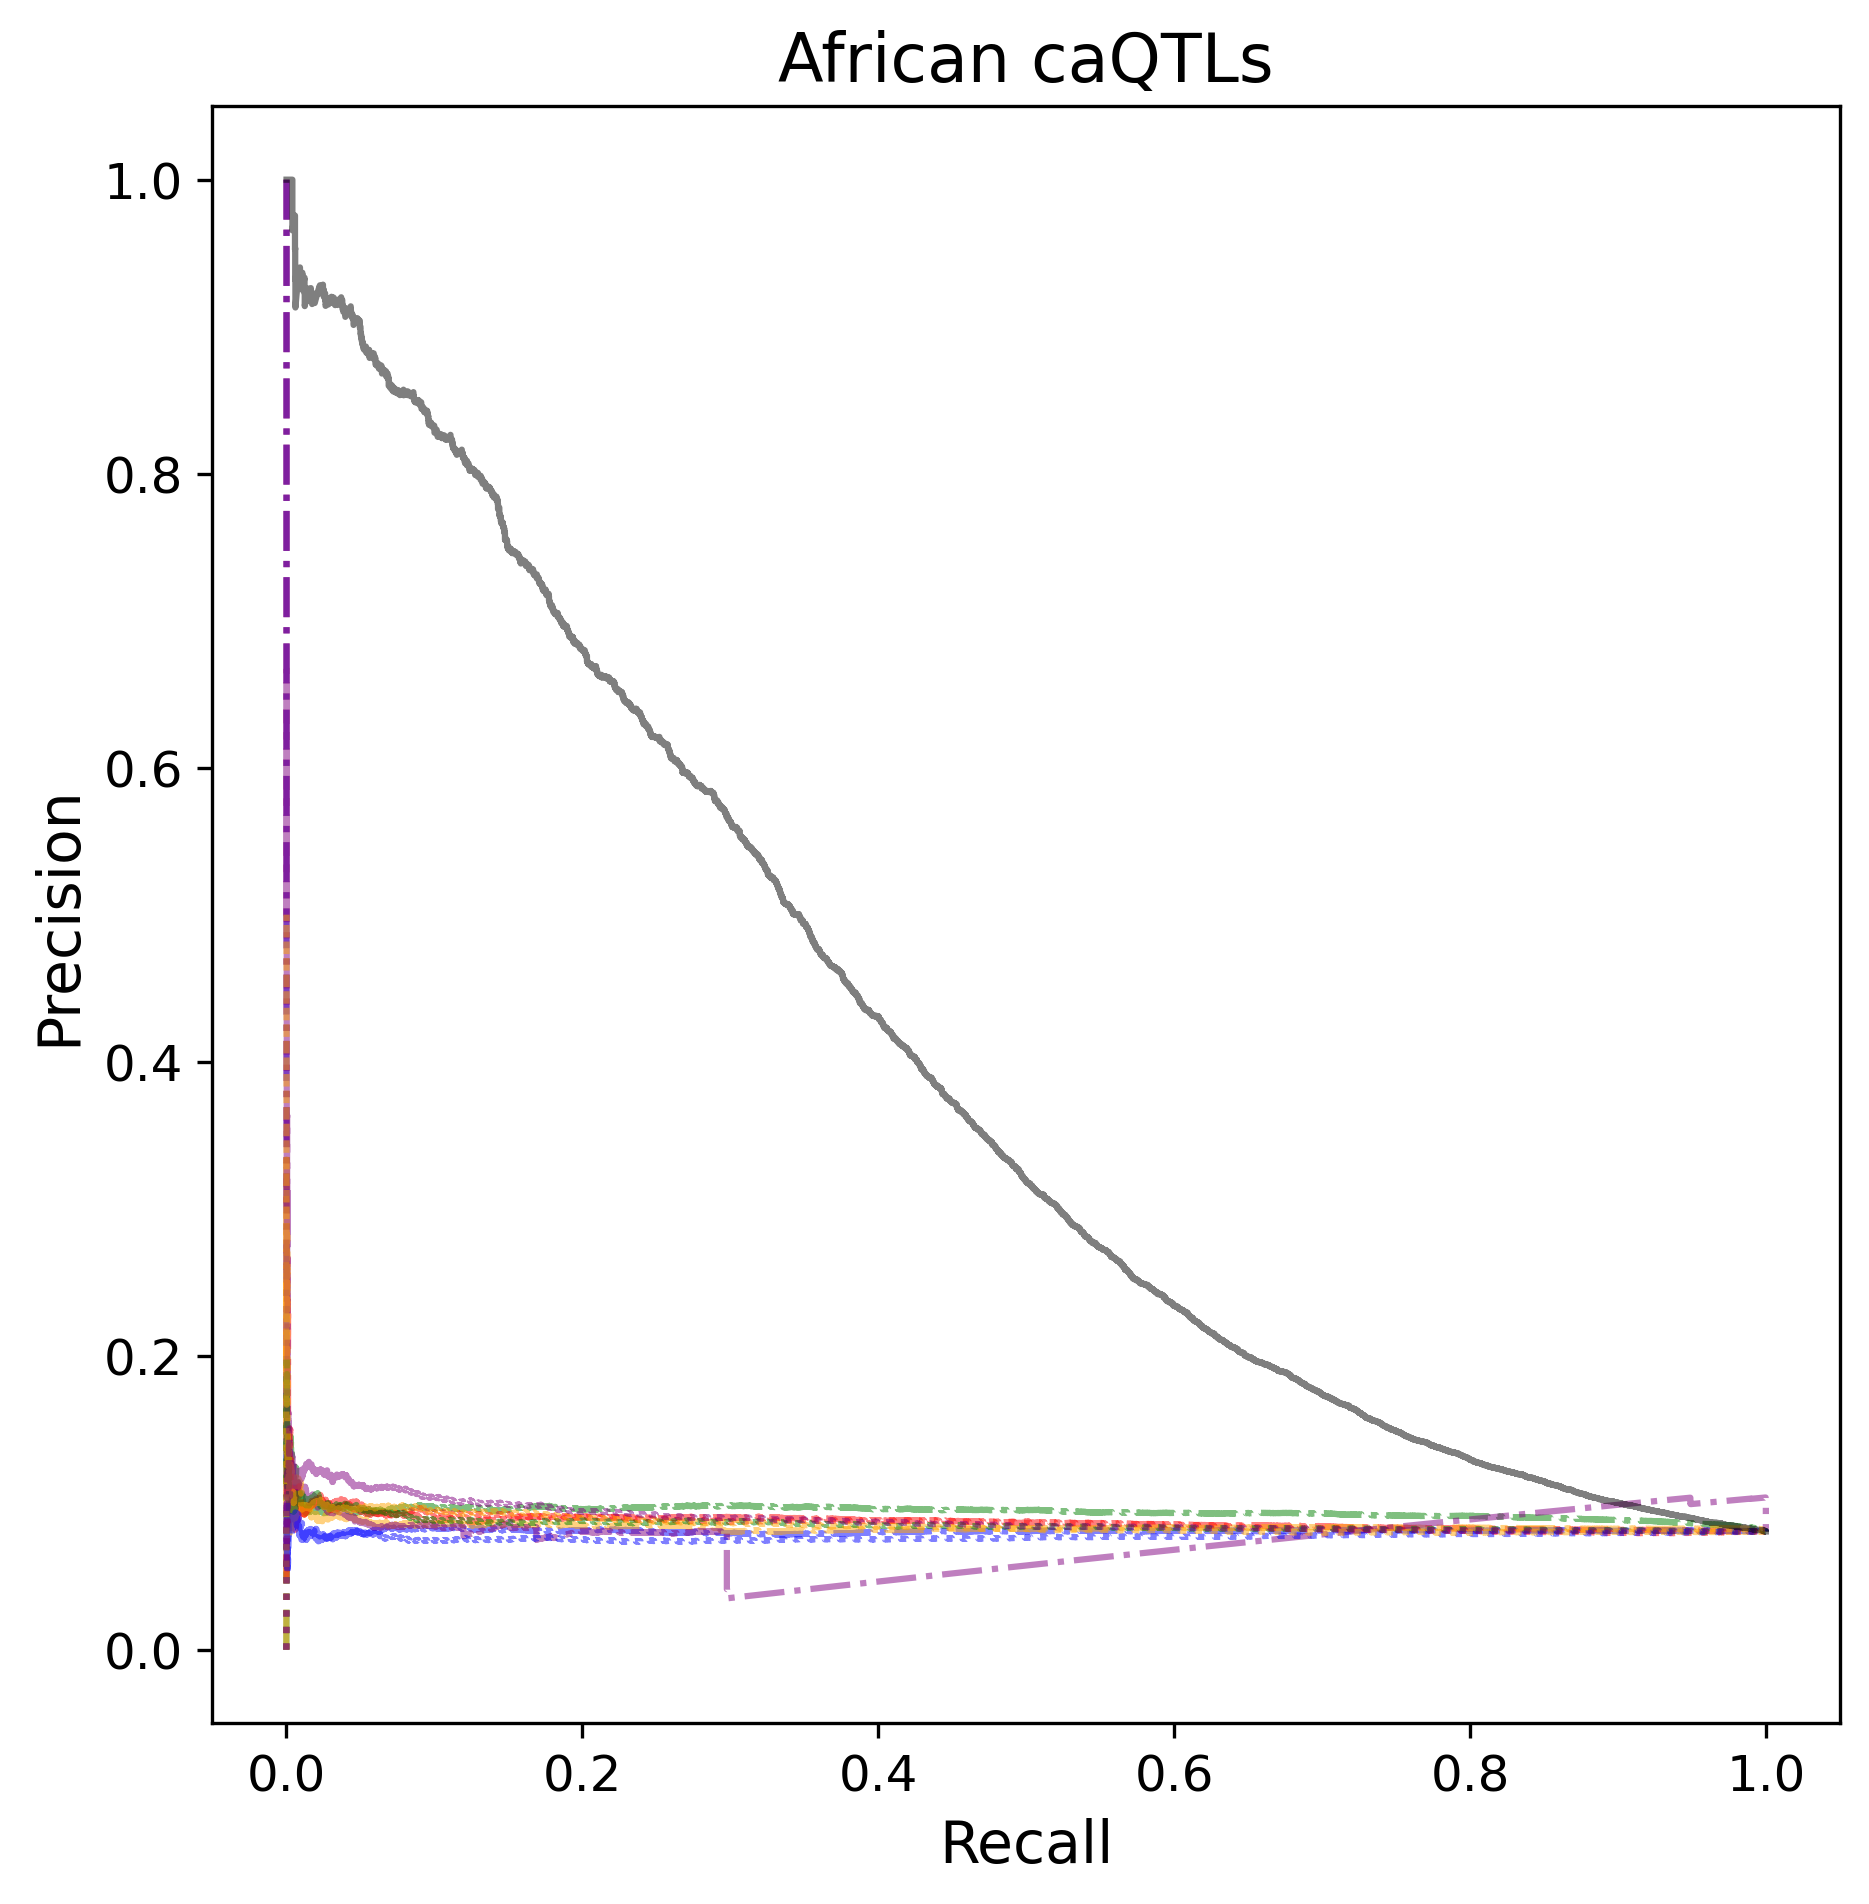

In [8]:
# model_names=["nucleotide-transformer-v2-500m-multi-species", "hyenadna-large-1m-seqlen-hf",
#             "DNABERT-2-117M", "gena-lm-bert-large-t2t", "Mistral-DNA-v1-1.6B-hg38"]
# models=["Nucleotide Transformer", "HyenaDNA", "DNABert2", "Gena LM", "Mistral DNA"]

model_names=["caduceus-ps_seqlen-131k_d_model-256_n_layer-16", "DNABERT-2-117M", "gena-lm-bert-large-t2t", 
             "hyenadna-large-1m-seqlen-hf", "Mistral-DNA-v1-1.6B-hg38", 
             "nucleotide-transformer-v2-500m-multi-species", ]
models=["Caduceus", "DNABert2", "Gena LM", "HyenaDNA", "Mistral DNA", "Nucleotide Transformer"]

model_paths = [os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/finetuned"), 
              os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/probed"),
              os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/zero_shot/embeddings")]
model_types = ["Finetuned", "Probed", "Zero-shot"]
colors = ["red", "green", "blue", "orange", "purple"]
linetypes = ["solid", "dashdot", "dotted"]

plt.figure(figsize=(7,7), dpi=300)
for model_path, model_type, linestyle in zip(model_paths, model_types, linetypes):
    for model_name, model, color in zip(model_names, models, colors):
        if os.path.isfile(f"{model_path}/{model_name}/Afr.CaQTLS.counts.tsv"):
            file = f"{model_path}/{model_name}/Afr.CaQTLS.counts.tsv"
            filtered_var__caQTLs_df_ctrl, filtered_var__caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(file)
            filtered_var__caQTLs_df_ctrl, ctrl_eur_counts = compute_change(filtered_var__caQTLs_df_ctrl)
            filtered_var__caQTLs_df_sig, sig_eur_counts = compute_change(filtered_var__caQTLs_df_sig)
            llm_scores = list(ctrl_eur_counts) + list(sig_eur_counts)
            labels = len(ctrl_eur_counts)*[0]+len(sig_eur_counts)*[1]
        elif os.path.isfile(f"{model_path}/{model_name}/Afr.CaQTLS.tsv"):    
            file = f"{model_path}/{model_name}/Afr.CaQTLS.tsv"
            filtered_var__caQTLs_df_ctrl, filtered_var__caQTLs_df_sig = sig_ctrl_variants_Afr_CaQTLs(file)
            ctrl_eur_counts = list(filtered_var__caQTLs_df_ctrl["cosine_distance"])
            sig_eur_counts = list(filtered_var__caQTLs_df_sig["cosine_distance"])
            llm_scores = list(ctrl_eur_counts) + list(sig_eur_counts)
            labels = len(ctrl_eur_counts)*[0]+len(sig_eur_counts)*[1]
        else:
            continue
        precision, recall = compute_precision_recall(labels, llm_scores)
        plt.plot(recall, precision, label=model_type + " " + model, linestyle=linestyle, color=color, alpha=0.5)

afr_caqtls_chrombpnet_ctrl, afr_caqtls_chrombpnet_sig = sig_ctrl_variants_Afr_CaQTLs(os.path.join(work_dir, "task_5_variant_effect_prediction/input_data/Afr.CaQTLS.tsv"))
ctrl_afr_counts = np.abs(afr_caqtls_chrombpnet_ctrl["chrombpnet.encsr000emt.variantscore.logfc"])
sig_afr_counts = np.abs(afr_caqtls_chrombpnet_sig["chrombpnet.encsr000emt.variantscore.logfc"])
chrombpnet_scores = list(ctrl_afr_counts) + list(sig_afr_counts)
labels = len(ctrl_afr_counts)*[0]+len(sig_afr_counts)*[1]

precision, recall = compute_precision_recall(labels, chrombpnet_scores)
plt.plot(recall, precision, label=model_type + " " + model, linestyle="solid", color="black", alpha=0.5)

plt.ylabel("Precision", fontsize=14)
plt.xlabel("Recall", fontsize=14)
plt.title("African caQTLs", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64


unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64


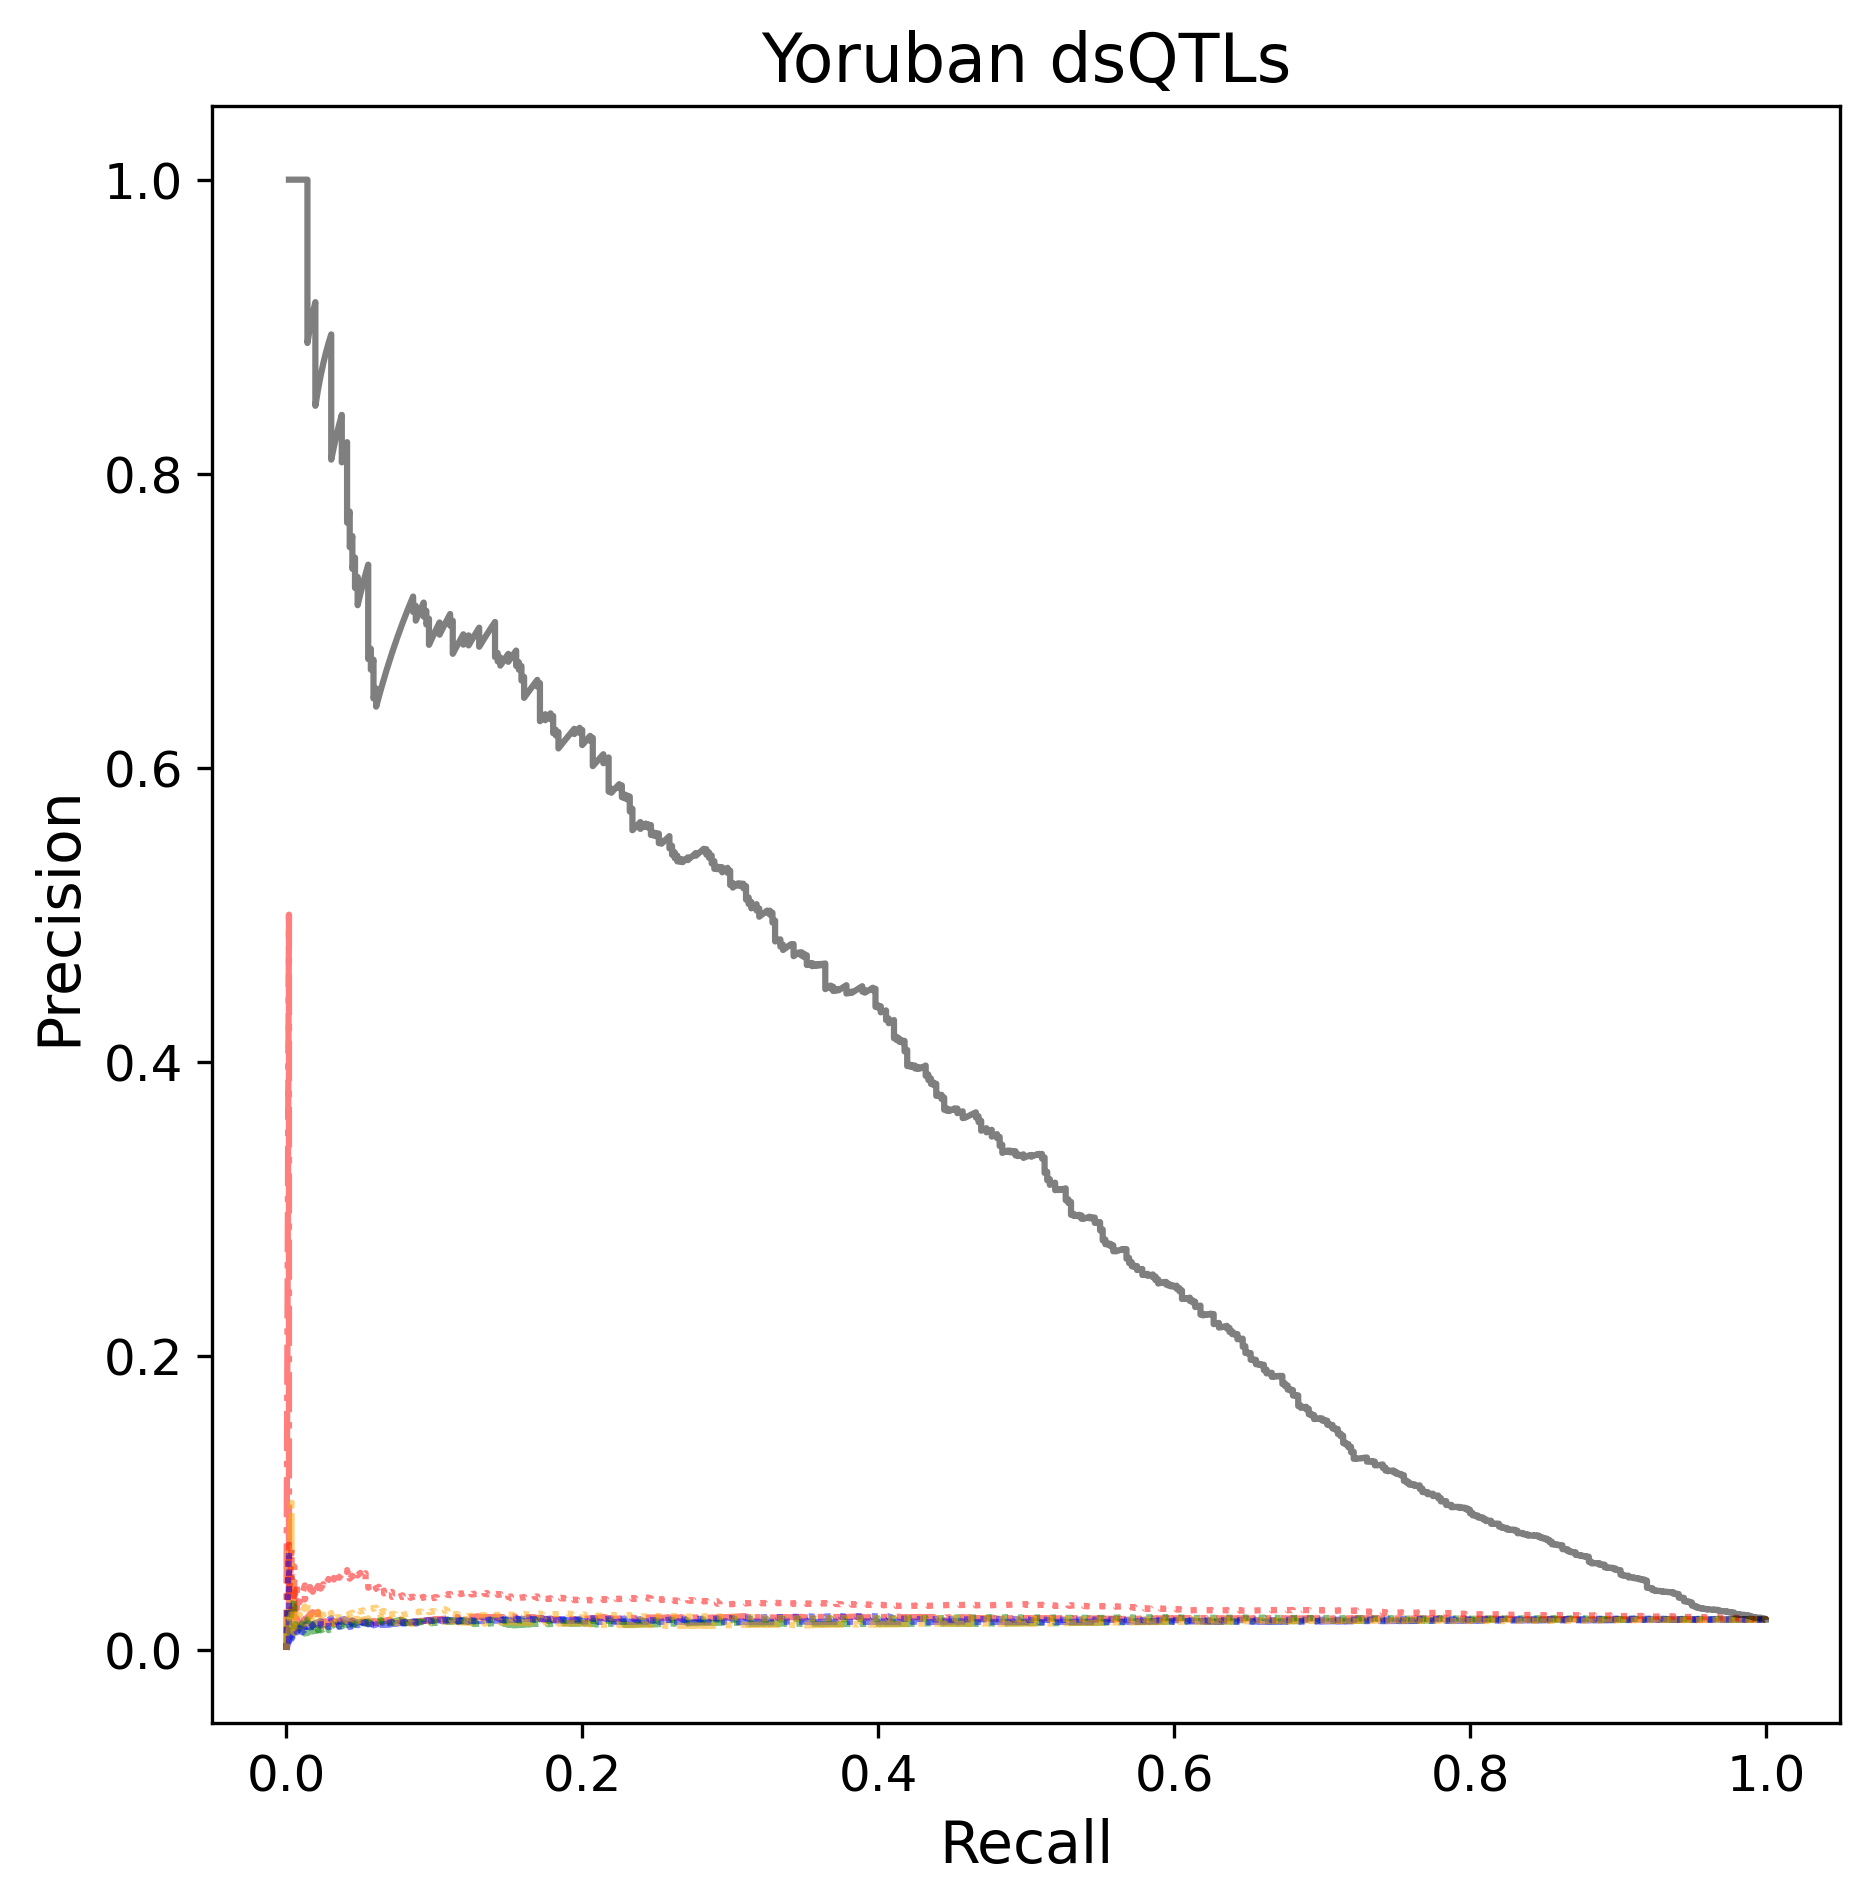

In [9]:
model_names=["nucleotide-transformer-v2-500m-multi-species", "hyenadna-large-1m-seqlen-hf",
            "DNABERT-2-117M", "gena-lm-bert-large-t2t", "Mistral-DNA-v1-1.6B-hg38"]
models=["Nucleotide Transformer", "HyenaDNA", "DNABert2", "Gena LM", "Mistral DNA"]

model_paths = [os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/finetuned"), 
              os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/probed"),
              os.path.join(work_dir, "task_5_variant_effect_prediction/outputs/zero_shot/embeddings")]
model_types = ["Finetuned", "Probed", "Zero-shot (Embeddings)"]
colors = ["red", "green", "blue", "orange"]
linetypes = ["solid", "dashdot", "dotted"]

plt.figure(figsize=(7,7), dpi=300)
for model_path, model_type, linestyle in zip(model_paths, model_types, linetypes):
    for model_name, model, color in zip(model_names, models, colors):
        if os.path.isfile(f"{model_path}/{model_name}/yoruban.dsqtls.counts.tsv"):
            file = f"{model_path}/{model_name}/yoruban.dsqtls.counts.tsv"
            filtered_var_dsQTLs_df_ctrl, filtered_var_dsQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(file)
            filtered_var_dsQTLs_df_ctrl, ctrl_eur_counts = compute_change(filtered_var_dsQTLs_df_ctrl, True)
            filtered_var_dsQTLs_df_sig, sig_eur_counts = compute_change(filtered_var_dsQTLs_df_sig, True)
            llm_scores = list(ctrl_eur_counts) + list(sig_eur_counts)
            labels = len(ctrl_eur_counts)*[0]+len(sig_eur_counts)*[1]
        elif os.path.isfile(f"{model_path}/{model_name}/yoruban.dsqtls.benchmarking.tsv"):    
            file = f"{model_path}/{model_name}/yoruban.dsqtls.benchmarking.tsv"
            filtered_var_dsQTLs_df_ctrl, filtered_var_dsQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(file)
            ctrl_eur_counts = list(filtered_var_dsQTLs_df_ctrl["cosine_distance"])
            sig_eur_counts = list(filtered_var_dsQTLs_df_sig["cosine_distance"])
            llm_scores = list(ctrl_eur_counts) + list(sig_eur_counts)
            labels = len(ctrl_eur_counts)*[0]+len(sig_eur_counts)*[1]
        else:
            continue
        precision, recall = compute_precision_recall(labels, llm_scores)
        plt.plot(recall, precision, label=model_type + " " + model, linestyle=linestyle, color=color, alpha=0.5)

yoruba_caQTLs_df_ctrl, yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(os.path.join(work_dir, "task_5_variant_effect_prediction/input_data/yoruban.dsqtls.benchmarking.tsv"))
ctrl_yoruba_counts = np.abs(yoruba_caQTLs_df_ctrl['pred.chrombpnet.encsr000emt.varscore.logfc'])
sig_yoruba_counts = np.abs(yoruba_caQTLs_df_sig['pred.chrombpnet.encsr000emt.varscore.logfc'])
chrombpnet_scores = list(ctrl_yoruba_counts) + list(sig_yoruba_counts)
labels = len(ctrl_yoruba_counts)*[0]+len(sig_yoruba_counts)*[1]

precision, recall = compute_precision_recall(labels, chrombpnet_scores)
plt.plot(recall, precision, label=model_type + " " + model, linestyle="solid", color="black", alpha=0.5)

plt.ylabel("Precision", fontsize=14)
plt.xlabel("Recall", fontsize=14)
plt.title("Yoruban dsQTLs", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

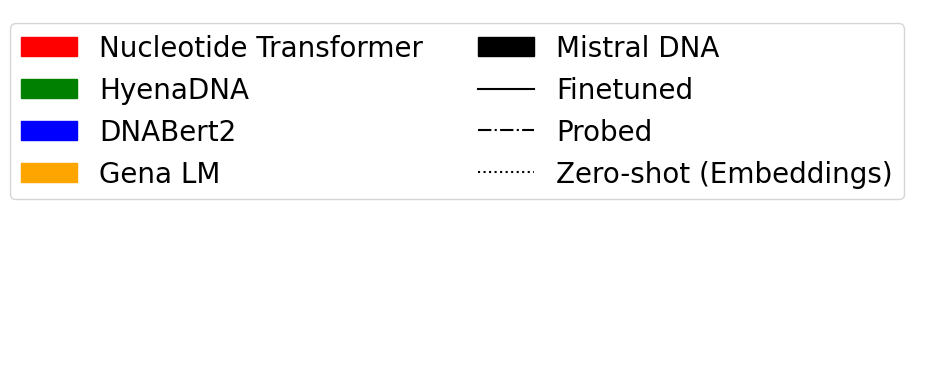

In [10]:
colors += ["black"]
models += ["ChromBPNet (Baseline)"]
color_handles = [mpatches.Patch(color=color, label=obj) for color, obj in zip(colors, models)]
line_handles = [mlines.Line2D([], [], color='black', linestyle=ls, label=cat) for ls, cat in zip(linetypes, model_types)]
handles = color_handles + line_handles  
labels = [h.get_label() for h in handles]
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
plt.legend(handles=handles, labels=labels, loc='upper right', ncol=2, fontsize="20")
plt.show()

In [11]:
def beta_logfc_cbpnet(filtered_df, title,  varscore, bpnet_score, ylabel="LogFC Scores"):
    if varscore in filtered_df.columns:
        x = filtered_df[varscore]
    y = filtered_df[bpnet_score]
    g = sns.jointplot(x=x, y=y, 
                    kind="scatter")

    pearson_corr, _ = pearsonr(x, y)
    spearman_corr, _ = spearmanr(x, y)

    plt.subplots_adjust(top=0.9)
    plt.xlabel("Significant caQTL Betas")
    plt.ylabel(ylabel)
    g.figure.suptitle(f'{title}\nPearson: {pearson_corr:.4f} --- Spearman: {spearman_corr:.4f}', 
                x=0.5, y=0.98, ha='center')
    plt.grid()
    plt.show()

    return pearson_corr, spearman_corr

unique label values label
False    77999
True      6821
Name: count, dtype: int64
African caQTL Mann Whitney pVal: 0.0


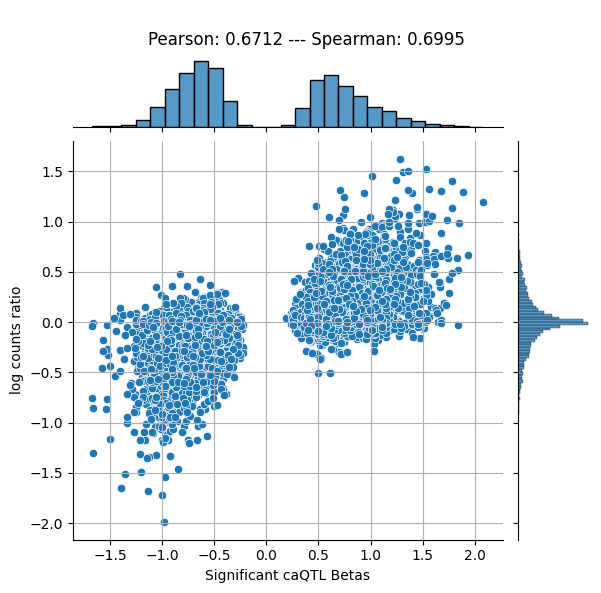

African caQTL pearson: 0.6711668110585041
African caQTL spearman: 0.6995268395159101
African caQTL AUPRC: 0.3972493901136265
African caQTL AUROC: 0.7716279688187222


In [12]:
afr_caqtls_chrombpnet_ctrl, afr_caqtls_chrombpnet_sig = sig_ctrl_variants_Afr_CaQTLs(os.path.join(work_dir, "task_5_variant_effect_prediction/input_data/Afr.CaQTLS.tsv"))
ctrl_afr_counts = np.abs(afr_caqtls_chrombpnet_ctrl["chrombpnet.encsr000emt.variantscore.logfc"])
sig_afr_counts = np.abs(afr_caqtls_chrombpnet_sig["chrombpnet.encsr000emt.variantscore.logfc"])
afr_stat, afr_pval = mannwhitneyu(ctrl_afr_counts, sig_afr_counts, alternative="less")
print("African caQTL Mann Whitney pVal:", afr_pval)
pearson, spearman = beta_logfc_cbpnet(afr_caqtls_chrombpnet_sig, "", "beta", "chrombpnet.encsr000emt.variantscore.logfc", "log counts ratio")
auprc, auroc = get_precision_recall_auc(ctrl_afr_counts, sig_afr_counts)
print("African caQTL pearson:", pearson)
print("African caQTL spearman:", spearman)
print("African caQTL AUPRC:", auprc)
print("African caQTL AUROC:", auroc)

unique label values var.label
-1    26813
 1      560
Name: count, dtype: int64
Yoruban caQTL Mann Whitney pVal: 7.610212887047973e-222


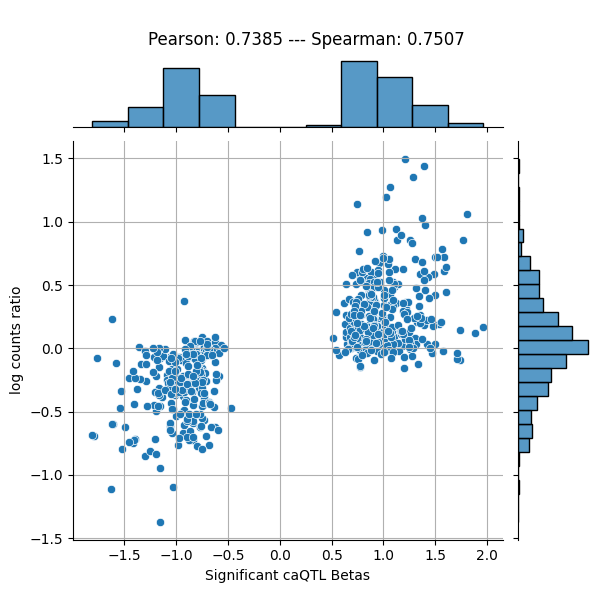

Yoruban caQTL pearson: 0.7384528353035674
Yoruban caQTL spearman: 0.7507441988602719
Yoruban caQTL AUPRC: 0.35867449247958794
Yoruban caQTL AUROC: 0.891626263379704


In [13]:
yoruba_caQTLs_df_ctrl, yoruba_caQTLs_df_sig = variants_Yoruba_LCL_dsQTLs(os.path.join(work_dir, "task_5_variant_effect_prediction/input_data/yoruban.dsqtls.benchmarking.tsv"))
ctrl_yoruba_counts = np.abs(yoruba_caQTLs_df_ctrl['pred.chrombpnet.encsr000emt.varscore.logfc'])
sig_yoruba_counts = np.abs(yoruba_caQTLs_df_sig['pred.chrombpnet.encsr000emt.varscore.logfc'])
afr_stat, afr_pval = mannwhitneyu(ctrl_yoruba_counts, sig_yoruba_counts, alternative="less")
print("Yoruban caQTL Mann Whitney pVal:", afr_pval)
pearson, spearman = beta_logfc_cbpnet(yoruba_caQTLs_df_sig, "", "obs.estimate", 'pred.chrombpnet.encsr000emt.varscore.logfc', "log counts ratio")
auprc, auroc = get_precision_recall_auc(ctrl_yoruba_counts, sig_yoruba_counts)
print("Yoruban caQTL pearson:", pearson)
print("Yoruban caQTL spearman:", spearman)
print("Yoruban caQTL AUPRC:", auprc)
print("Yoruban caQTL AUROC:", auroc)